# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

## First dataset - Hypothesis 1

In [2]:
kaggle_path = "letmewin97/coronavirus-tweets"
kaggle_path_Name = "Corona.csv"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfCoronaTweets = pd.read_csv(r'Corona.csv/Corona.csv')

In [4]:
dfCoronaTweets.head(3)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive

### Descriptive analysis

In [5]:
dfCoronaTweets.shape

(41157, 6)

In [6]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCoronaTweets)

Total  PercNotNull
Location        8590        79.13
Sentiment          0       100.00
OriginalTweet      0       100.00
TweetAt            0       100.00
ScreenName         0       100.00
UserName           0       100.00

In [7]:
dfCoronaTweets['TweetAt']= dfCoronaTweets['TweetAt'].astype('datetime64[ns]')

In [8]:
dfCoronaTweets.dtypes

UserName                  int64
ScreenName                int64
Location                 object
TweetAt          datetime64[ns]
OriginalTweet            object
Sentiment                object
dtype: object

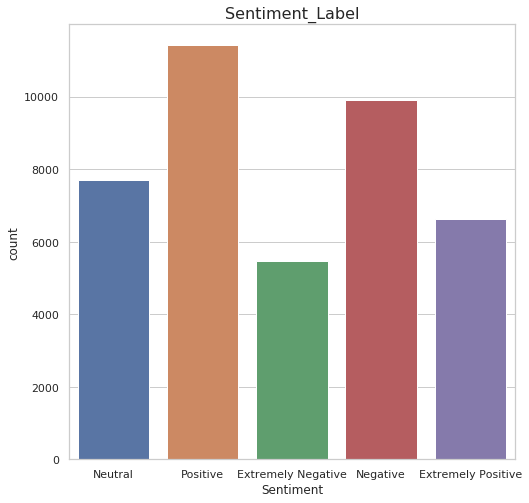

In [9]:
count_categorical(dfCoronaTweets, 'Sentiment', 'Sentiment_Label')

In [10]:
dfCoronaTweets_dummy = pd.get_dummies(dfCoronaTweets['Sentiment'])
dfCoronaTweets_dummy.shape

(41157, 5)

In [11]:
dfCoronaTweets_dummy.head(3)

Extremely Negative  Extremely Positive  Negative  Neutral  Positive
0                   0                   0         0        1         0
1                   0                   0         0        0         1
2                   0                   0         0        0         1

In [12]:
dfCoronaTweets_concat = pd.concat([dfCoronaTweets, dfCoronaTweets_dummy], axis=1)
dfCoronaTweets_concat.shape

(41157, 11)

In [13]:
#dfCoronaTweets_concat['TweetAt']= dfCoronaTweets_concat['TweetAt'].astype('datetime64[ns]')

In [14]:
#dfCoronaTweets_concat.dtypes

In [15]:
dfCoronaTweets_concat.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral   
1  advice Talk to your neighbours family to excha...  Positive   
2  Coronavirus Australia: Woolworths to give elde...  Positive   

   Extremely Negative  Extremely Positive  Negative  Neutral  Positive  
0                   0                   0         0        1         0  
1                   0                   0         0        0         1  
2                   0                   0         0        0         1

In [16]:
dfCoronaTweets_gr =  dfCoronaTweets_concat.groupby("TweetAt")['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'].sum()
dfCoronaTweets_gr.reset_index(inplace=True)
dfCoronaTweets_gr.shape

(30, 6)

In [17]:
dfCoronaTweets_gr.head(3)

TweetAt  Extremely Negative  Extremely Positive  Negative  Neutral  \
0 2020-01-04                90.0                89.0     156.0    125.0   
1 2020-02-04               119.0               141.0     242.0    201.0   
2 2020-03-04               103.0               117.0     208.0    154.0   

   Positive  
0     170.0  
1     251.0  
2     228.0

In [18]:
dfCoronaTweets_gr_melt = pd.melt(dfCoronaTweets_gr,id_vars=['TweetAt'], value_vars=['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'],
                           var_name = "evaluation", value_name = "count")
dfCoronaTweets_gr_melt.shape

(150, 3)

In [19]:
dfCoronaTweets_gr_melt.head(3)

TweetAt          evaluation  count
0 2020-01-04  Extremely Negative   90.0
1 2020-02-04  Extremely Negative  119.0
2 2020-03-04  Extremely Negative  103.0

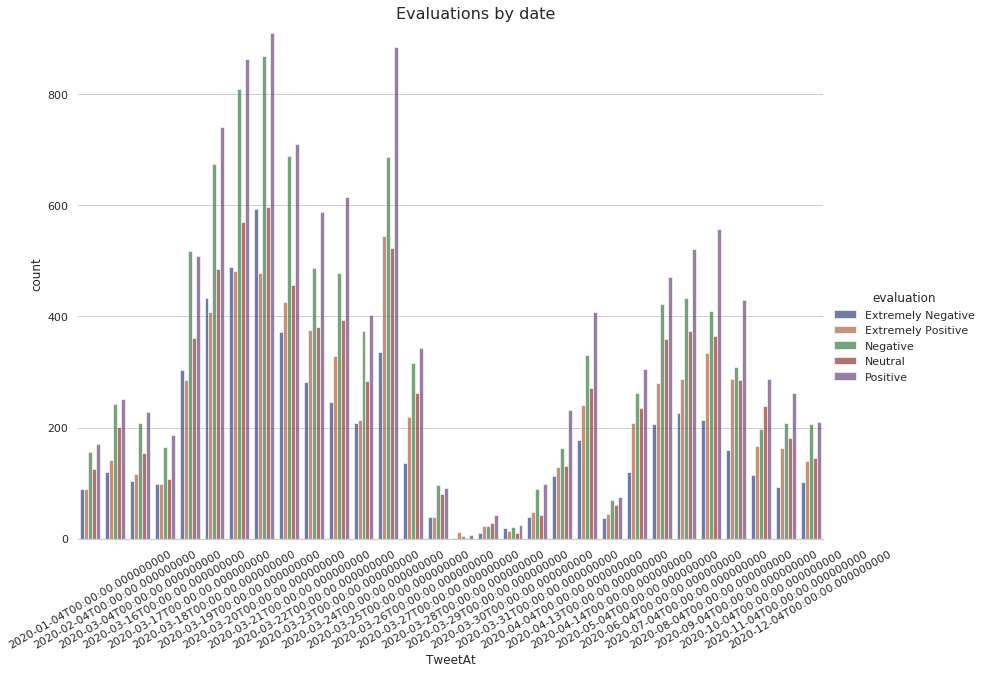

In [20]:
categorical_plot(df=dfCoronaTweets_gr_melt, p_kind="bar", p_x="TweetAt", p_y="count", 
                 p_hue ="evaluation", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Evaluations by date")

In [21]:
#pd.isnull(dfCoronaTweets_gr_melt)
dfCoronaTweets_gr_melt.isnull().values.any()

False

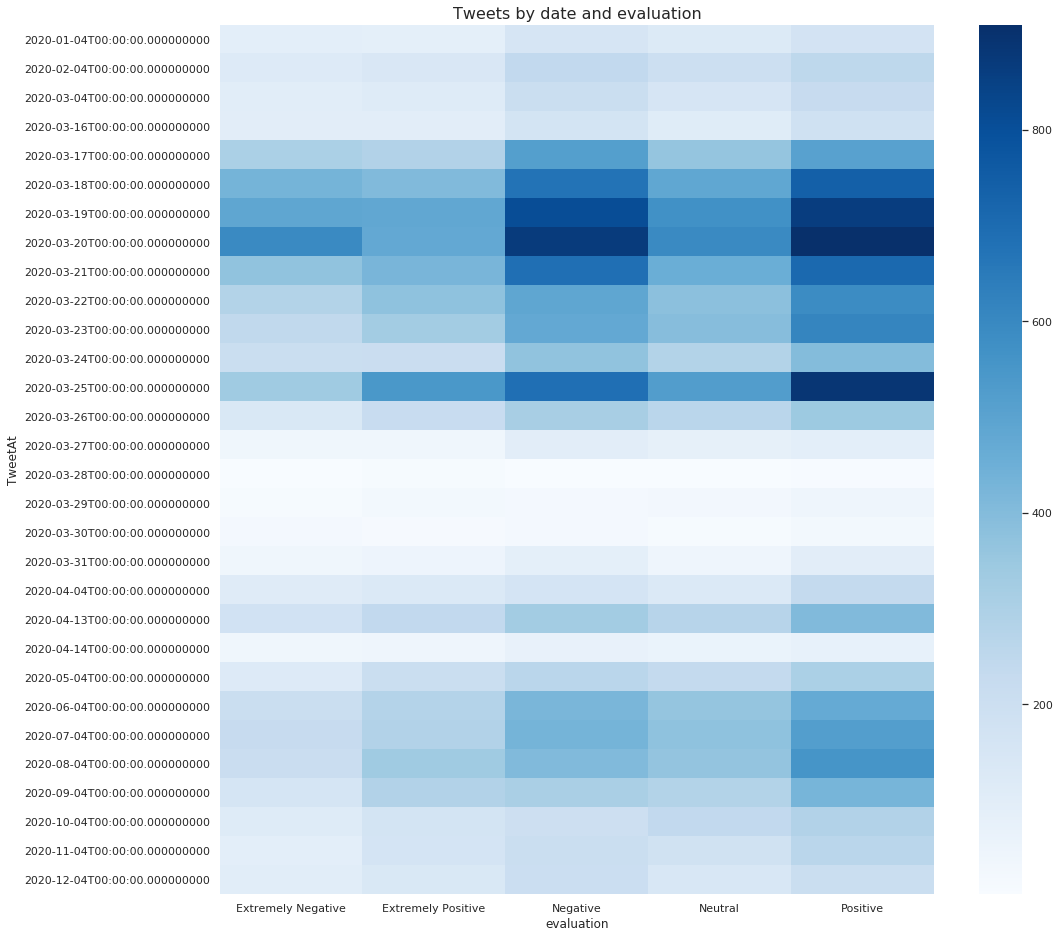

In [22]:
dfCoronaTweets_gr_melt_pivot = dfCoronaTweets_gr_melt.pivot('TweetAt','evaluation','count')
pivot_heatmap(df=dfCoronaTweets_gr_melt_pivot, p_annot=False, p_cmap="Blues", fig_size_width = 16, fig_size_height =16, p_ax_title="Tweets by date and evaluation")

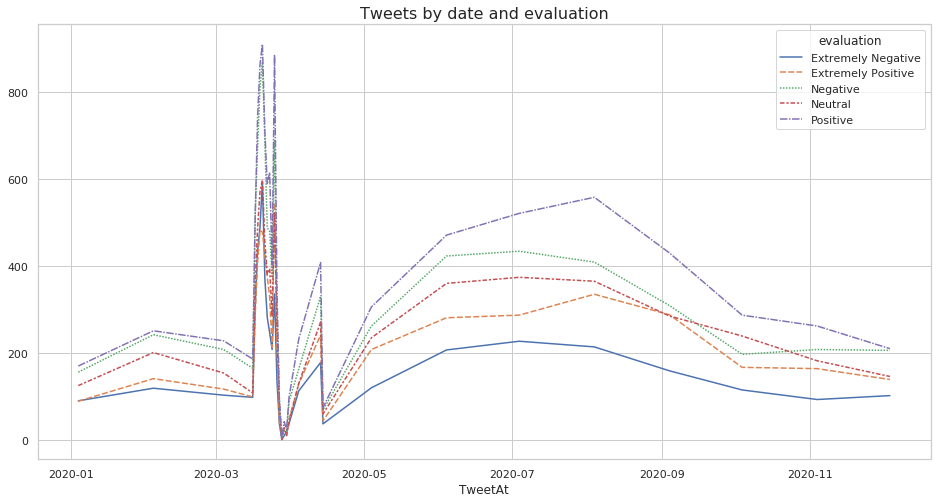

In [23]:
pivot_lineplot(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

In [24]:
#dfCoronaTweets_gr_loc =  dfCoronaTweets_concat.groupby("Location").sum()
#dfCoronaTweets_gr_loc

### Hypothesis 1: Average perception difference in first semester versus second semester of the year

#### Population we have

In [25]:
dfCoronaTweets.shape

(41157, 6)

In [26]:
#I decided to create my own compound index, based on a simple scale [-1, 1]
dfCoronaTweets['compound_index'] = dfCoronaTweets.apply (lambda row: get_compound_acceptance_index(row), axis=1)
dfCoronaTweets.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  compound_index  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral             0.0  
1  advice Talk to your neighbours family to excha...  Positive             0.5  
2  Coronavirus Australia: Woolworths to give elde...  Positive             0.5

In [27]:
dfCoronaTweets_first_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] < '2020-07-01']
dfCoronaTweets_first_sem.shape

(33245, 7)

In [28]:
dfCoronaTweets_second_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] > '2020-06-30']
dfCoronaTweets_second_sem.shape

(7912, 7)

In [29]:
dfCoronaTweets_first_sem.head(3)

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   

                                       OriginalTweet Sentiment  compound_index  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral             0.0  
1  advice Talk to your neighbours family to excha...  Positive             0.5  
2  Coronavirus Australia: Woolworths to give elde...  Positive             0.5

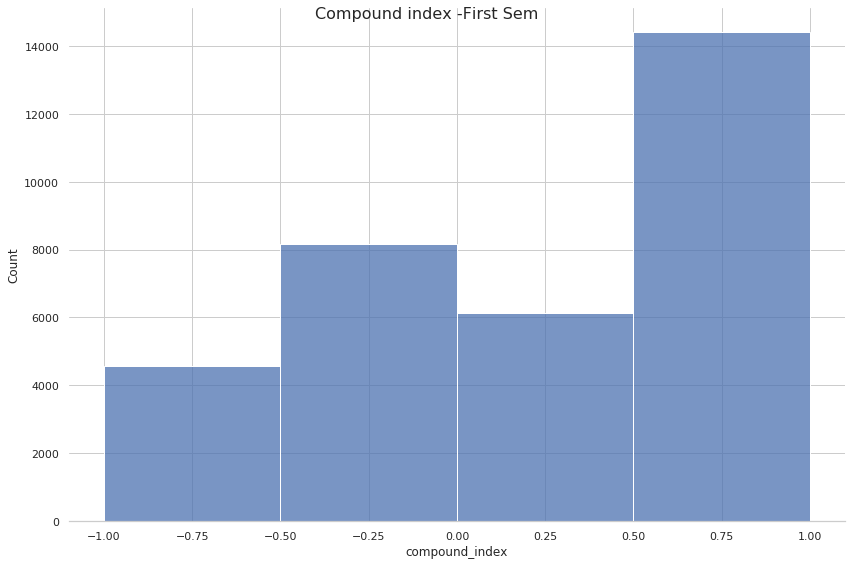

In [30]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

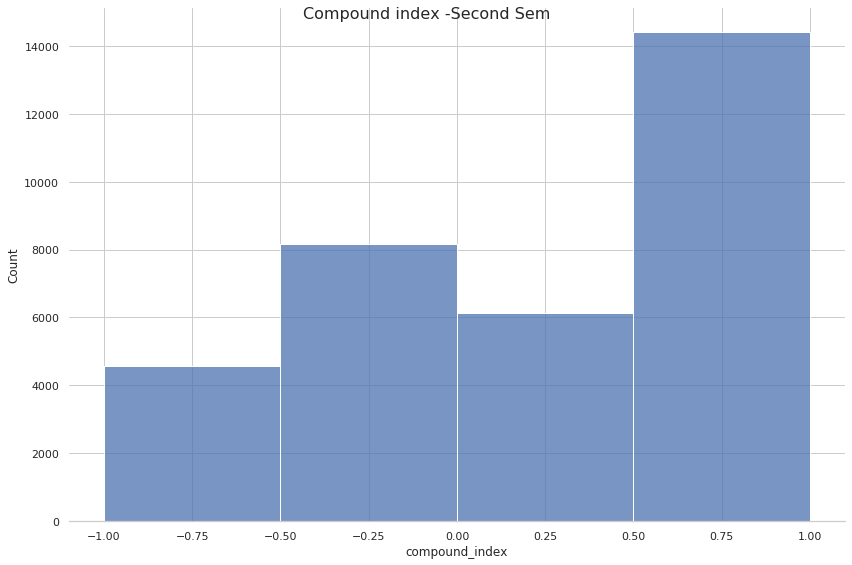

In [31]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [32]:
#sns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 8))
#sns.boxplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem)
#sns.stripplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem, color=".25")
#plt.title('Class - fare price distribution')
#plt.show()

In [33]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.035283501278387724
Second semester mean: 0.09131698685540951


In [34]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6512719165471448
Second semester std: 0.6391529002573112


#### getting sample from both DFs

In [35]:
dfCoronaTweets_first_sem = dfCoronaTweets_first_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_first_sem.shape

(16622, 7)

In [36]:
dfCoronaTweets_second_sem = dfCoronaTweets_second_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_second_sem.shape

(3956, 7)

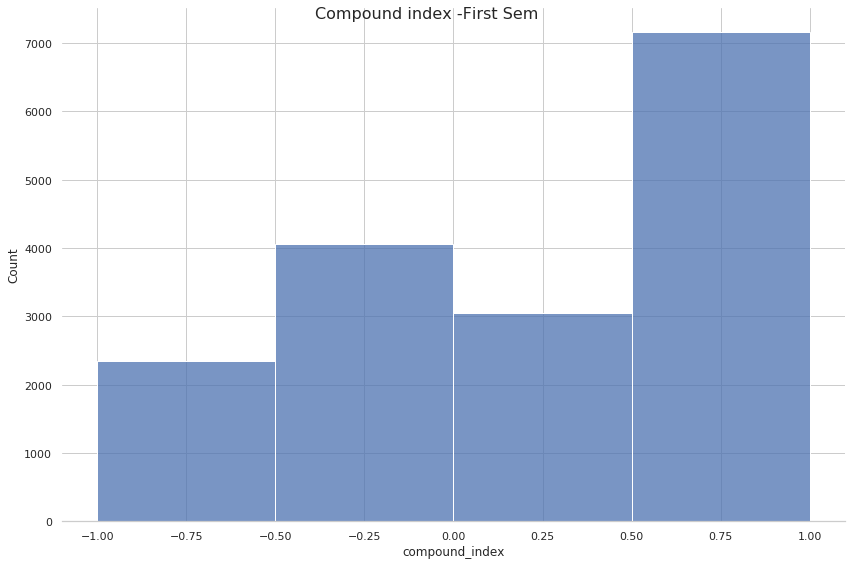

In [37]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

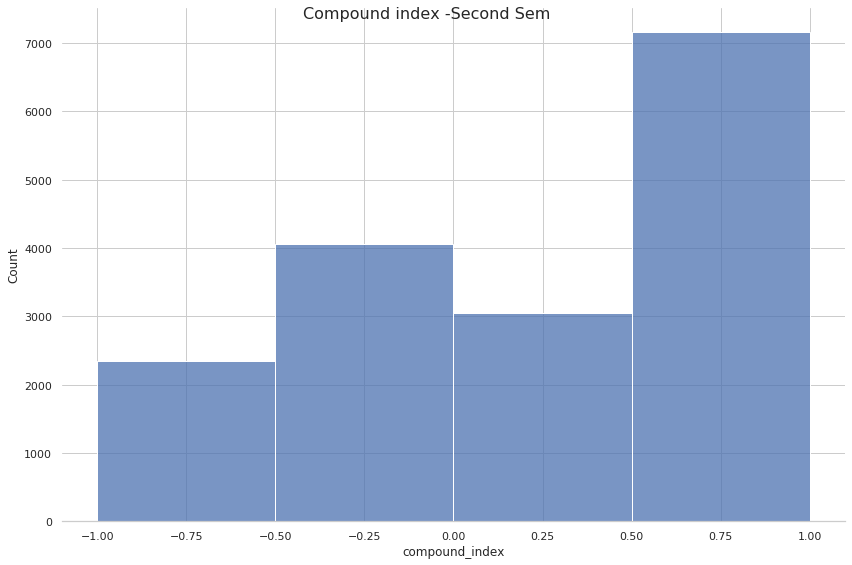

In [38]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [39]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.03164480808566959
Second semester mean: 0.09567745197168857


In [40]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6542201623873477
Second semester std: 0.6389261068542247


### T-test for the means of two independent samples of scores.

In [41]:
#The recall:
# I know the equal_var = True will perform Welch’s t-test, which does not assume equal population variance.
# if the sample size is sufficiently large, a t-test will work even if the population is not approximately normally distributed
Ttest_indResult_tuple = sts.ttest_ind(dfCoronaTweets_first_sem.compound_index,
                dfCoronaTweets_second_sem.compound_index,
                equal_var= True)

In [42]:
#statistic
Ttest_indResult_tuple[0]

-5.557545338825863

In [43]:
#pvalue
Ttest_indResult_tuple[1]

2.7698633168195436e-08

In [44]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [45]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centred"
                     "on a mean of {} (first semester),"
                     "also contains an observation of {} (second semester)."
                     "Also, "
                     "second semester mean it's {} standard erros away from the first semester mean"
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centredon a mean of 0.03164480808566959 (first semester),also contains an observation of 0.09567745197168857 (second semester).Also, second semester mean it's -5.557545338825863 standard erros away from the first semester mean


## Second dataset - Hypothesis 2

In [46]:
kaggle_path = "antgoldbloom/covid19-data-from-john-hopkins-university"
kaggle_path_Name = "john_hopkins_university_data_set"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [47]:
dfCovid19GlobalDeaths = pd.read_csv(r'john_hopkins_university_data_set/RAW_global_deaths.csv')

In [48]:
dfCovid19GlobalDeaths.head(3)

Country/Region Province/State       Lat       Long  1/22/20  1/23/20  \
0    Afghanistan            NaN  33.93911  67.709953        0        0   
1        Albania            NaN  41.15330  20.168300        0        0   
2        Algeria            NaN  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/27/20  11/28/20  11/29/20  \
0        0        0        0        0  ...      1740      1752      1774   
1        0        0        0        0  ...       771       787       798   
2        0        0        0        0  ...      2372      2393      2410   

   11/30/20  12/1/20  12/2/20  12/3/20  12/4/20  12/5/20  12/6/20  
0      1795     1822     1841     1846     1846     1864     1874  
1       810      822      839      852      870      889      905  
2      2431     2447     2464     2480     2492     2501     2516  

[3 rows x 324 columns]

In [49]:
dfDemograpgics = pd.read_csv("https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv")
dfDemograpgics.head(3)

Country Name Country Code  Birth rate  Internet users         Income Group
0        Aruba          ABW      10.244            78.9          High income
1  Afghanistan          AFG      35.253             5.9           Low income
2       Angola          AGO      45.985            19.1  Upper middle income

### Descriptive analysis

In [50]:
get_nulls_data(dfDemograpgics)

Total  PercNotNull
Income Group        0        100.0
Internet users      0        100.0
Birth rate          0        100.0
Country Code        0        100.0
Country Name        0        100.0

In [51]:
dfCovid19GlobalDeaths_georeference = build_geodf(dfCovid19GlobalDeaths, lat_col_name='Lat', lon_col_name='Long' )

In [52]:
totalGeoDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()
dfCovid19GlobalDeaths_georeference['Total'] = totalGeoDeathList

In [53]:
dfCovid19GlobalDeaths_georeference.head(3)

Country/Region Province/State       Lat       Long  1/22/20  1/23/20  \
0    Afghanistan            NaN  33.93911  67.709953        0        0   
1        Albania            NaN  41.15330  20.168300        0        0   
2        Algeria            NaN  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/29/20  11/30/20  12/1/20  \
0        0        0        0        0  ...      1774      1795     1822   
1        0        0        0        0  ...       798       810      822   
2        0        0        0        0  ...      2410      2431     2447   

   12/2/20  12/3/20  12/4/20  12/5/20  12/6/20                   geometry  \
0     1841     1846     1846     1864     1874  POINT (67.70995 33.93911)   
1      839      852      870      889      905  POINT (20.16830 41.15330)   
2     2464     2480     2492     2501     2516   POINT (1.65960 28.03390)   

   Total  
0   1874  
1    905  
2   2516  

[3 rows x 326 columns]

In [54]:
dfCovid19GlobalDeaths_georeference = dfCovid19GlobalDeaths_georeference[["Country/Region", "Province/State", "Lat", "Long", "geometry", "Total" ]]
dfCovid19GlobalDeaths_georeference.head(3)

Country/Region Province/State       Lat       Long  \
0    Afghanistan            NaN  33.93911  67.709953   
1        Albania            NaN  41.15330  20.168300   
2        Algeria            NaN  28.03390   1.659600   

                    geometry  Total  
0  POINT (67.70995 33.93911)   1874  
1  POINT (20.16830 41.15330)    905  
2   POINT (1.65960 28.03390)   2516

In [55]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCovid19GlobalDeaths_georeference)

Total  PercNotNull
Province/State    188        30.63
Long                1        99.63
Lat                 1        99.63
Total               0       100.00
geometry            0       100.00
Country/Region      0       100.00

<class 'pandas.core.series.Series'>


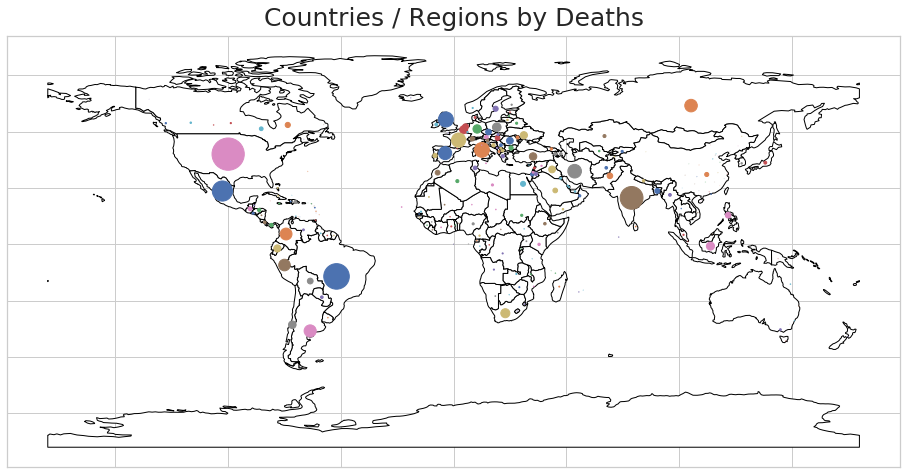

In [56]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

max_cant = len(dfCovid19GlobalDeaths_georeference)

markersize = dfCovid19GlobalDeaths_georeference['Total'] / max_cant
print(type(markersize))


dfCovid19GlobalDeaths_georeference.plot(ax=ax, color=sns.color_palette(None, max_cant), markersize=markersize)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Deaths', fontsize=25, pad=10)

plt.show()

In [57]:
dfCovid19GlobalDeaths_geo_demo = pd.merge(dfCovid19GlobalDeaths_georeference, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

In [58]:
dfCovid19GlobalDeaths_geo_demo.head(3)

Country/Region Province/State       Lat       Long  \
0    Afghanistan            NaN  33.93911  67.709953   
1        Albania            NaN  41.15330  20.168300   
2        Algeria            NaN  28.03390   1.659600   

                    geometry  Total Country Name Country Code  Birth rate  \
0  POINT (67.70995 33.93911)   1874  Afghanistan          AFG      35.253   
1  POINT (20.16830 41.15330)    905      Albania          ALB      12.877   
2   POINT (1.65960 28.03390)   2516      Algeria          DZA      24.738   

   Internet users         Income Group  
0             5.9           Low income  
1            57.2  Upper middle income  
2            16.5  Upper middle income

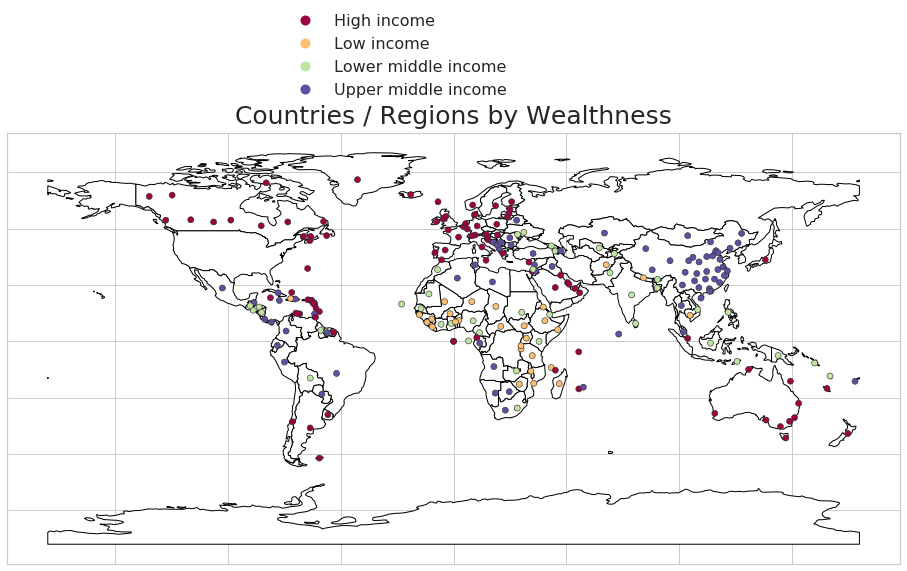

In [59]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

dfCovid19GlobalDeaths_geo_demo.plot(column='Income Group', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False}, ax=ax)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Wealthness', fontsize=25, pad=10)

plt.show()

In [60]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeaths[["Country/Region", "Province/State"]]

In [61]:
#The last columns is the most recent data
#totalDeathList = dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]].to_list()
#dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]]
totalDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()

In [62]:
dfCovid19GlobalDeathsLast['Total'] = totalDeathList

/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
dfCovid19GlobalDeathsLast.head(3)

Country/Region Province/State  Total
0    Afghanistan            NaN   1874
1        Albania            NaN    905
2        Algeria            NaN   2516

In [64]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeathsLast.groupby('Country/Region').sum().reset_index()
dfCovid19GlobalDeathsLast.head(3)

Country/Region  Total
0    Afghanistan   1874
1        Albania    905
2        Algeria   2516

In [65]:
dfCovid19GlobalDeathGeo = pd.merge(dfCovid19GlobalDeathsLast, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

### Testing for Normality

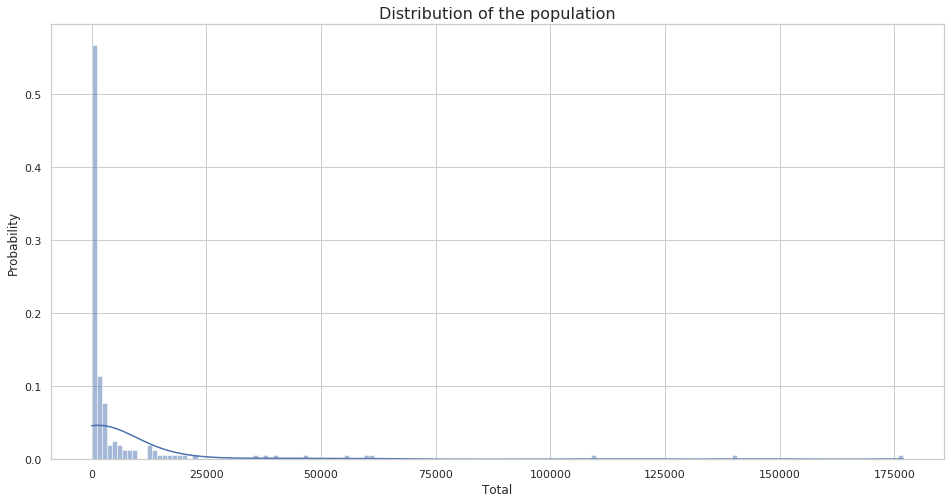

In [66]:
custom_histplot(df = dfCovid19GlobalDeathGeo, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the population")

In [67]:
dfCovid19GlobalDeathGeo_sample = dfCovid19GlobalDeathGeo.sample(frac=0.5, replace=False, random_state=1)
dfCovid19GlobalDeathGeo_sample.shape

(78, 7)

In [68]:
dfCovid19GlobalDeathGeo_sample.head(3)

Country/Region  Total Country Name Country Code  Birth rate  \
117          Qatar    239        Qatar          QAT       11.94   
75      Kazakhstan   2488   Kazakhstan          KAZ       22.73   
51          France  55247       France          FRA       12.30   

     Internet users         Income Group  
117         85.3000          High income  
75          54.0000  Upper middle income  
51          81.9198          High income

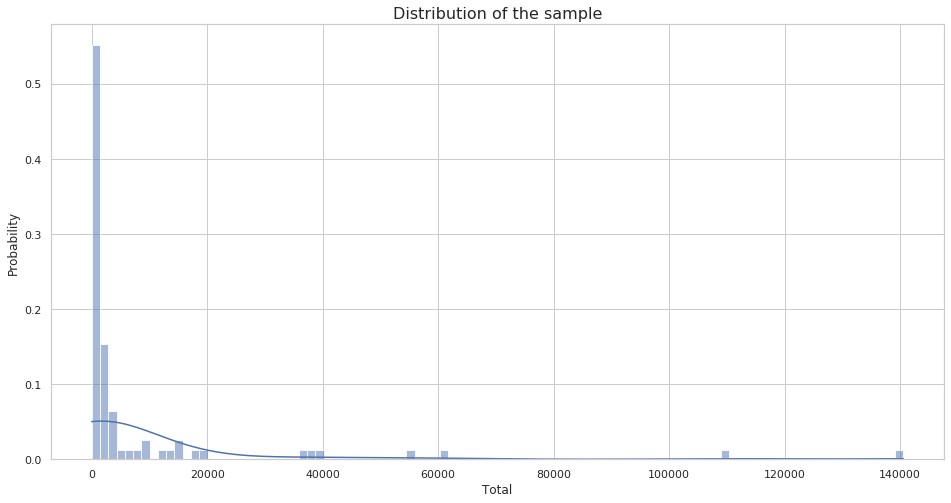

In [69]:
custom_histplot(df = dfCovid19GlobalDeathGeo_sample, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the sample")

#### The Shapiro-Wilk test

In [70]:
#Shapiro-Wilk Test: The Shapiro-Wilk tests if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed.
Ttest_indResult_tuple = sts.shapiro(dfCovid19GlobalDeathGeo_sample["Total"])

In [71]:
#statistic
Ttest_indResult_tuple[0]

0.41874611377716064

In [72]:
#pvalue
Ttest_indResult_tuple[1]

5.280551623949078e-16

In [73]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


#### Box Plots / QQ Plots

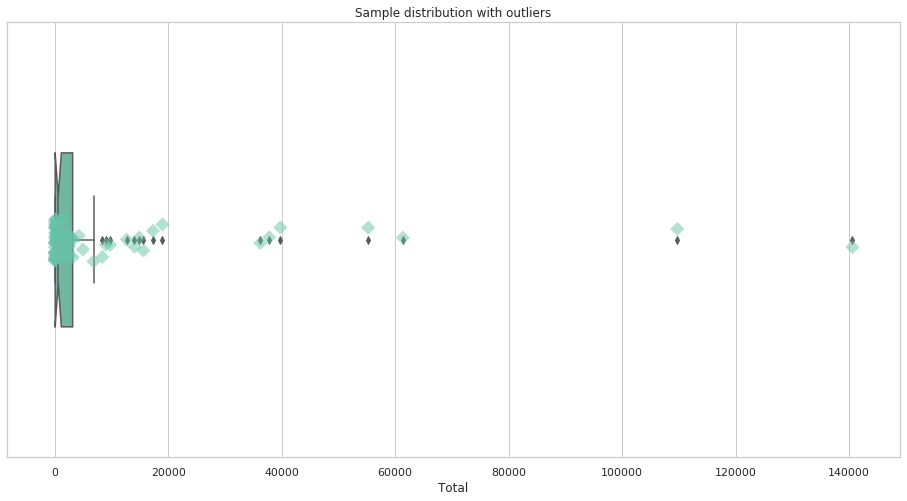

In [74]:
custom_boxplot_stripplot(dfCovid19GlobalDeathGeo_sample, p_x = "Total", p_ax_title = "Sample distribution with outliers")

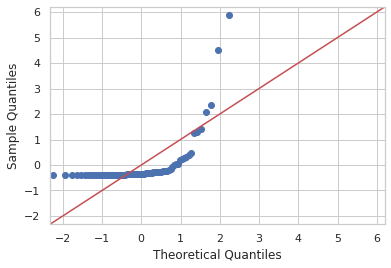

In [75]:
qqplot(dfCovid19GlobalDeathGeo_sample["Total"],  fit = True,line = "45").show()

#### The Kolmogorov-Smirnov test

In [76]:
Ttest_indResult_tuple = sts.kstest(dfCovid19GlobalDeathGeo_sample["Total"], 'norm', args=(dfCovid19GlobalDeathGeo_sample["Total"].mean(), dfCovid19GlobalDeathGeo_sample["Total"].std()))

In [77]:
#statistic
Ttest_indResult_tuple[0]

0.3532048996552293

In [78]:
#pvalue
Ttest_indResult_tuple[1]

3.2911124068393028e-09

In [79]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


### Kruskal-Wallis H-test tests

In [80]:
IncomeGrps = pd.unique(dfCovid19GlobalDeathGeo_sample["Income Group"].values)
IncomeGrps

array(['High income', 'Upper middle income', 'Lower middle income',
       'Low income'], dtype=object)

In [81]:
dfData_f_test = {grp:dfCovid19GlobalDeathGeo_sample['Total'][dfCovid19GlobalDeathGeo_sample["Income Group"] == grp] for grp in IncomeGrps}
#dfData_f_test

In [82]:
#Anova Test
Ttest_indResult_tuple = sts.kruskal(dfData_f_test['Low income'], dfData_f_test['Upper middle income'], 
                    dfData_f_test['High income'], dfData_f_test['Lower middle income'])

In [83]:
#statistic
Ttest_indResult_tuple[0]

10.633934274114392

In [84]:
#pvalue
Ttest_indResult_tuple[1]

0.013879332272018841

In [85]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [86]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable that in this " 
                     "non normal distribution (chi square) the population median of all of the groups are equal."
                     "But, rejecting the null hypothesis does not indicate which of the groups differs."
                     "One or more sample distributions are not equal."
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable that in this non normal distribution (chi square) the population median of all of the groups are equal.But, rejecting the null hypothesis does not indicate which of the groups differs.One or more sample distributions are not equal.


## Third dataset - Hypothesis 3

In [87]:
kaggle_path = "jboysen/mri-and-alzheimers"
kaggle_path_Name = "alzheimers_data_set"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [88]:
dfAlzheimers = pd.read_csv(r'alzheimers_data_set/oasis_longitudinal.csv')

In [89]:
dfAlzheimers.head(3)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046

### Descriptive analysis

In [90]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfAlzheimers)

Total  PercNotNull
SES            19        94.91
MMSE            2        99.46
ASF             0       100.00
nWBV            0       100.00
eTIV            0       100.00
CDR             0       100.00
EDUC            0       100.00
Age             0       100.00
Hand            0       100.00
M/F             0       100.00
MR Delay        0       100.00
Visit           0       100.00
Group           0       100.00
MRI ID          0       100.00
Subject ID      0       100.00

In [91]:
#I decided to create a categorical variable, based on Clinical Dementia Rating
dfAlzheimers['cdr_cat'] = dfAlzheimers.apply (lambda row: get_clinical_dementia_rating(row), axis=1)
dfAlzheimers.head(3)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF             cdr_cat  
0  2.0  27.0  0.0  1987  0.696  0.883              Normal  
1  2.0  30.0  0.0  2004  0.681  0.876              Normal  
2  NaN  23.0  0.5  1678  0.736  1.046  Very Mild Dementia

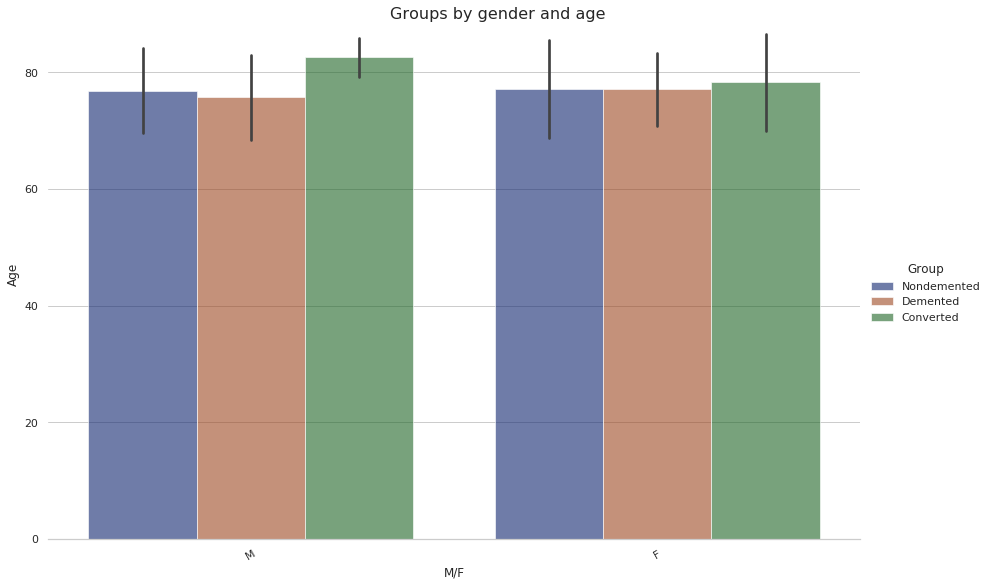

In [92]:
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="M/F", p_y="Age", 
                 p_hue ="Group", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by gender and age")

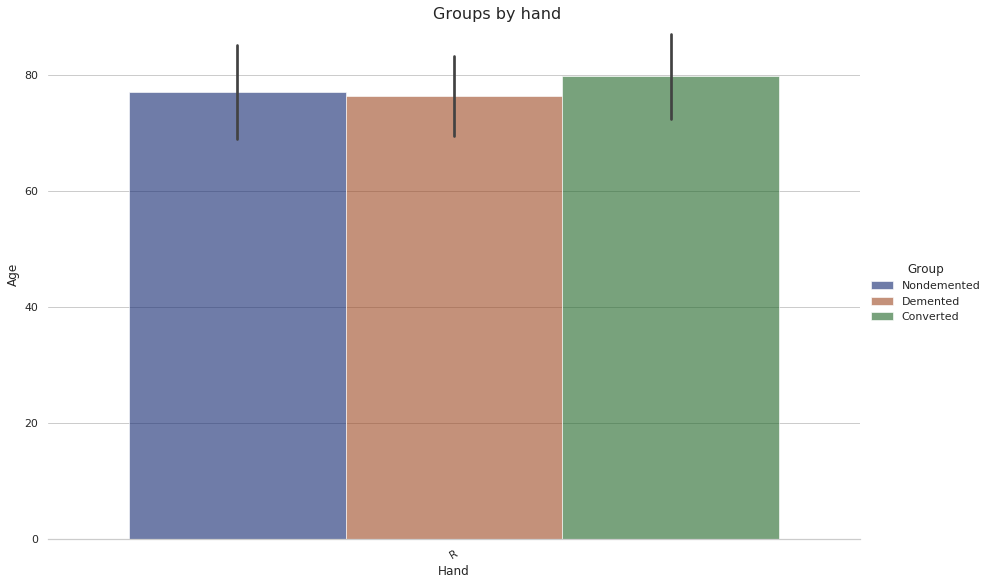

In [93]:
#All the population is right handed so, I decided there is not point to take this column as a variable
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="Hand", p_y="Age", 
                 p_hue ="Group", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by hand")

Explanation about the CDR rating: 
https://www.sciencedirect.com/topics/medicine-and-dentistry/clinical-dementia-rating

0-Normal,
0.5-Very Mild Dementia,
1-Mild Dementia,
2-Moderate Dementia,
3-5-Severe Dementia

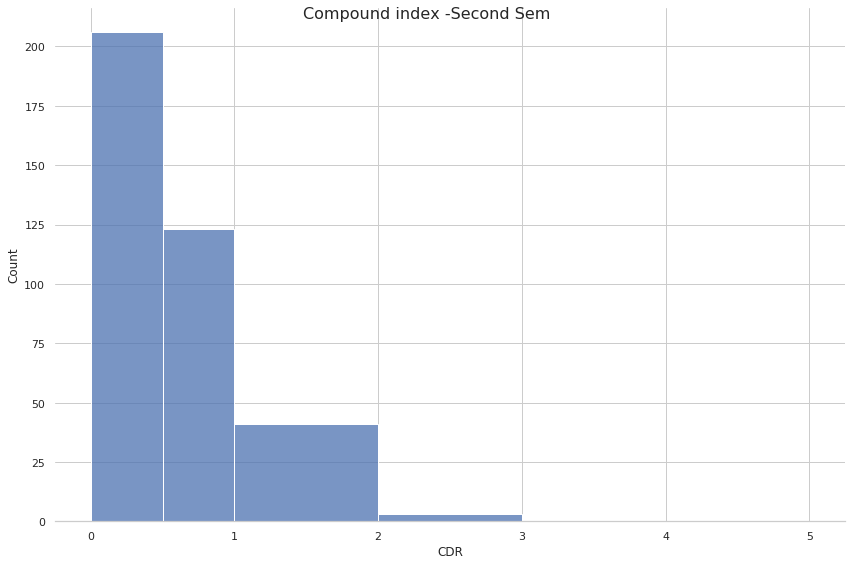

In [94]:
custom_displot(dfAlzheimers, p_x="CDR", p_bins=[0,0.5, 1, 2, 3, 4, 5], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

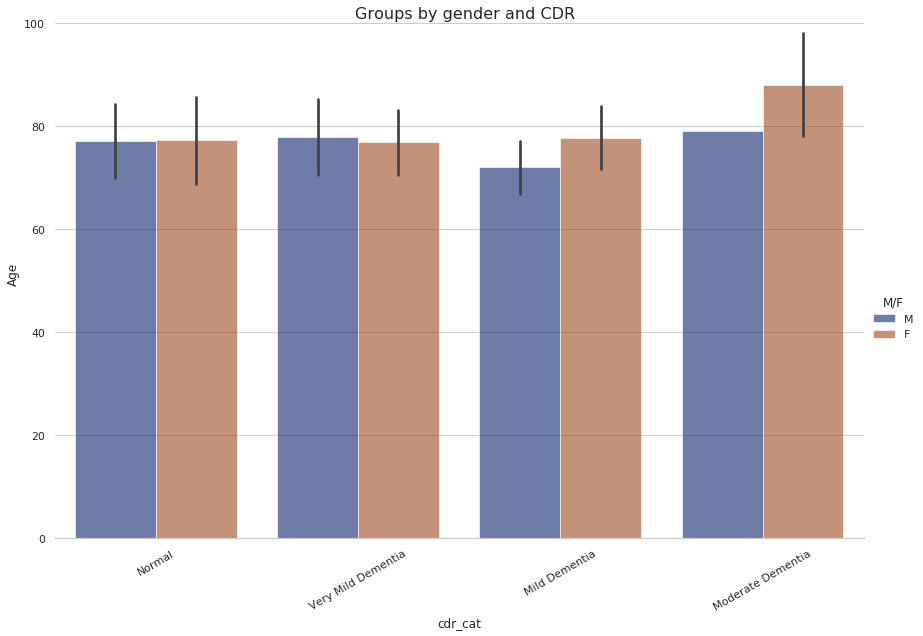

In [95]:
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="cdr_cat", p_y="Age", 
                 p_hue ="M/F", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by gender and CDR")

### Chi-square test of independence of variables in a contingency table.

In [96]:
dfAlzheimers_sample = dfAlzheimers.sample(frac=0.5, replace=False, random_state=1)
dfAlzheimers_sample.shape

(186, 16)

In [97]:
contingency_table = pd.crosstab(dfAlzheimers_sample["M/F"], dfAlzheimers_sample["cdr_cat"],  margins = False) 

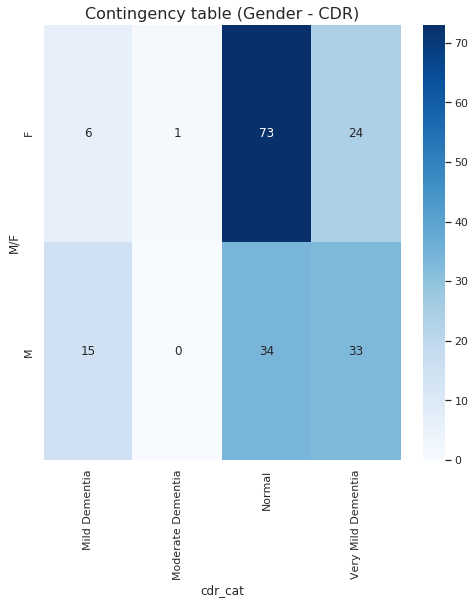

In [98]:
pivot_heatmap(df=contingency_table, p_annot=True, p_cmap="Blues",  fig_size_width = 8, fig_size_height = 8, p_ax_title="Contingency table (Gender - CDR)")

In [99]:
Observed_Values = contingency_table.values
Observed_Values

array([[ 6,  1, 73, 24],
       [15,  0, 34, 33]])

In [100]:
chi2, p_value, dof, ex = sts.chi2_contingency(contingency_table)

In [101]:
#Stablishing hyphotesis parameters (Significance level in this case)
alpha = 0.05

In [102]:
critical_value = sts.chi2.ppf(q=1-alpha,df=dof)
critical_value

7.814727903251179

In [103]:
#Printing what we got so far
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chi2)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 18.144845640604643
critical_value: 7.814727903251179
p-value: 0.0004106060386043071


In [104]:
chi_square_hypothesis_determination(p_alpha = alpha, p_chi2 = chi2, p_dof = dof, pval = p_value, p_critical_value = critical_value)

Validation_1:

Validating chi2>=critical_value: I have enough evidence to reject H0 (There is a relationship between the categorical variables). Therefore, I assume H1 with a confidence of 95.0%, significance of 5.0%, statistic of 18.144845640604643, degree of freedom of 3, p_value of 0.0004106060386043071 and  crital value of 7.814727903251179.

Validation_2:

Validating pval<=alpha: I have enough evidence to reject H0 (There is a relationship between the categorical variables). Therefore, I assume H1 with a confidence of 95.0%, significance of 5.0%, statistic of 18.144845640604643, degree of freedom of 3, p_value of 0.0004106060386043071 and  crital value of 7.814727903251179.


## linear model

In [105]:
kaggle_path = "kumarajarshi/life-expectancy-who"
kaggle_path_Name = "life_expectancy_who"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [106]:
dfLifeExpectancyWho = pd.read_csv(r'life_expectancy_who/Life Expectancy Data.csv')

In [107]:
dfLifeExpectancyWho.head(3)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  

[3 rows x 22 columns]

### Descriptive analysis

In [108]:
dfLifeExpectancyWho.shape

(2938, 22)

In [109]:
datasetColsExplanation()

('Country --> Country',
 'Year --> Year',
 'Status --> Developed or Developing status',
 'Life expectancy --> Life Expectancy in age',
 'Adult Mortality --> Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)',
 'infant deaths --> Number of Infant Deaths per 1000 population',
 'Alcohol --> Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
 'percentage expenditure -- Expenditure on health as a percentage of Gross Domestic Product per capita(%)',
 'Hepatitis B --> Hepatitis B (HepB) immunization coverage among 1-year-olds (%)',
 'Measles --> Measles - number of reported cases per 1000 population',
 'BMI --> Average Body Mass Index of entire population',
 'under-five deaths --> Number of under-five deaths per 1000 population',
 'Polio --> Polio (Pol3) immunization coverage among 1-year-olds (%)',
 'Total expenditure --> General government expenditure on health as a percentage of total government expenditure (%)'

In [110]:
#Renaming the columns, basically eliminating the inter-spaces by adding underscores
dfLifeExpectancyWho = dfLifeExpectancyWho.rename(
    columns={
        " BMI ": "BMI",
        "Life expectancy ": "Life_Expectancy",
        "Adult Mortality": "Adult_Mortality",
        "infant deaths": "Infant_Deaths",
        "percentage expenditure": "Percentage_Exp",
        "Hepatitis B": "HepatitisB",
        "Measles ": "Measles",
        "under-five deaths ": "Under_Five_Deaths",
        "Diphtheria ": "Diphtheria",
        " HIV/AIDS": "HIV/AIDS",
        " thinness  1-19 years": "thinness_1to19_years",
        " thinness 5-9 years": "thinness_5to9_years",
        "Income composition of resources": "Income_Comp_Of_Resources",
        "Total expenditure": "Tot_Exp",
    }
)

In [111]:
dfLifeExpectancyWho.dtypes

Country                      object
Year                          int64
Status                       object
Life_Expectancy             float64
Adult_Mortality             float64
Infant_Deaths                 int64
Alcohol                     float64
Percentage_Exp              float64
HepatitisB                  float64
Measles                       int64
BMI                         float64
Under_Five_Deaths             int64
Polio                       float64
Tot_Exp                     float64
Diphtheria                  float64
HIV/AIDS                    float64
GDP                         float64
Population                  float64
thinness_1to19_years        float64
thinness_5to9_years         float64
Income_Comp_Of_Resources    float64
Schooling                   float64
dtype: object

#### Dealing with nulls

In [112]:
dfLifeExpectancyWho.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [113]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfLifeExpectancyWho)

Total  PercNotNull
Population                  652        77.81
HepatitisB                  553        81.18
GDP                         448        84.75
Tot_Exp                     226        92.31
Alcohol                     194        93.40
Income_Comp_Of_Resources    167        94.32
Schooling                   163        94.45
BMI                          34        98.84
thinness_1to19_years         34        98.84
thinness_5to9_years          34        98.84
Diphtheria                   19        99.35
Polio                        19        99.35
Adult_Mortality              10        99.66
Life_Expectancy              10        99.66
Under_Five_Deaths             0       100.00
HIV/AIDS                      0       100.00
Measles                       0       100.00
Percentage_Exp                0       100.00
Infant_Deaths                 0       100.00
Status                        0       100.00
Year                          0       100.00
Country                       0       100.00

In [114]:
# The dataset it is pretty clean, but it needs some data wrangling(munging)

In [115]:
dfLifeExpectancyWhoFix = dfLifeExpectancyWho.copy()

In [116]:
# The good news is the missing value cols are numeric. So, lets calculate the median as a "quick fix"
dfLifeExpectancyWhoFix = fixing_col_nulls(dfLifeExpectancyWhoFix)

In [117]:
#Checking out nulls: now is 100% clean
get_nulls_data(dfLifeExpectancyWhoFix)

Total  PercNotNull
Schooling                     0        100.0
Income_Comp_Of_Resources      0        100.0
Year                          0        100.0
Status                        0        100.0
Life_Expectancy               0        100.0
Adult_Mortality               0        100.0
Infant_Deaths                 0        100.0
Alcohol                       0        100.0
Percentage_Exp                0        100.0
HepatitisB                    0        100.0
Measles                       0        100.0
BMI                           0        100.0
Under_Five_Deaths             0        100.0
Polio                         0        100.0
Tot_Exp                       0        100.0
Diphtheria                    0        100.0
HIV/AIDS                      0        100.0
GDP                           0        100.0
Population                    0        100.0
thinness_1to19_years          0        100.0
thinness_5to9_years           0        100.0
Country                       0        100.0

#### Checking distribution of our target variable

In [118]:
dfLifeExpectancyWhoFix["Life_Expectancy"].mean()

69.23471749489455

In [119]:
dfLifeExpectancyWhoFix["Life_Expectancy"].std()

9.509115008147452

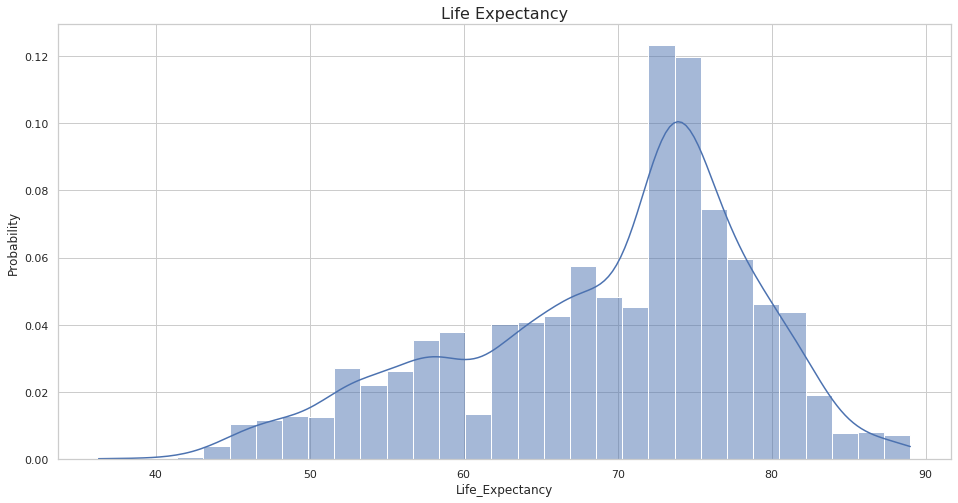

In [120]:
custom_histplot(df = dfLifeExpectancyWhoFix, p_x = "Life_Expectancy", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Life Expectancy")

#### Spliting the dataset between features and target variable

In [121]:
# Note: Some of the actions I'll take are related to the the exercise directions 
# (maybe in real world I'll take another approaches). For examples:
# I'm not going to create dummmy variables since the beggining for the categorical variables:
# {Country , object} and {Status, object}

#So, at first we gonna keep the non categorical vars
non_cate_preliminar_X = dfLifeExpectancyWhoFix.drop('Life_Expectancy', axis=1)
non_cate_preliminar_X = non_cate_preliminar_X.drop('Country', axis=1)
non_cate_preliminar_X = non_cate_preliminar_X.drop('Status', axis=1)
#print("X_type ==>", type(non_cate_preliminar_X))

In [122]:
non_cate_preliminar_X.head(3)

Year  Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  \
0  2015            263.0             62     0.01       71.279624        65.0   
1  2014            271.0             64     0.01       73.523582        62.0   
2  2013            268.0             66     0.01       73.219243        64.0   

   Measles   BMI  Under_Five_Deaths  Polio  Tot_Exp  Diphtheria  HIV/AIDS  \
0     1154  19.1                 83    6.0     8.16        65.0       0.1   
1      492  18.6                 86   58.0     8.18        62.0       0.1   
2      430  18.1                 89   62.0     8.13        64.0       0.1   

          GDP  Population  thinness_1to19_years  thinness_5to9_years  \
0  584.259210  33736494.0                  17.2                 17.3   
1  612.696514    327582.0                  17.5                 17.5   
2  631.744976  31731688.0                  17.7                 17.7   

   Income_Comp_Of_Resources  Schooling  
0                     0.479       10.1  
1                     0.476       10.0  
2                     0.470        9.9

#### Describing corralation between features and target

In [123]:
non_cate_plus_target_preliminar = non_cate_preliminar_X.copy()
#Including target
non_cate_plus_target_preliminar["Life_Expectancy"] = dfLifeExpectancyWhoFix["Life_Expectancy"]

In [124]:
#sns.pairplot(non_cate_plus_target_preliminar)# It's unreadeable so for many features

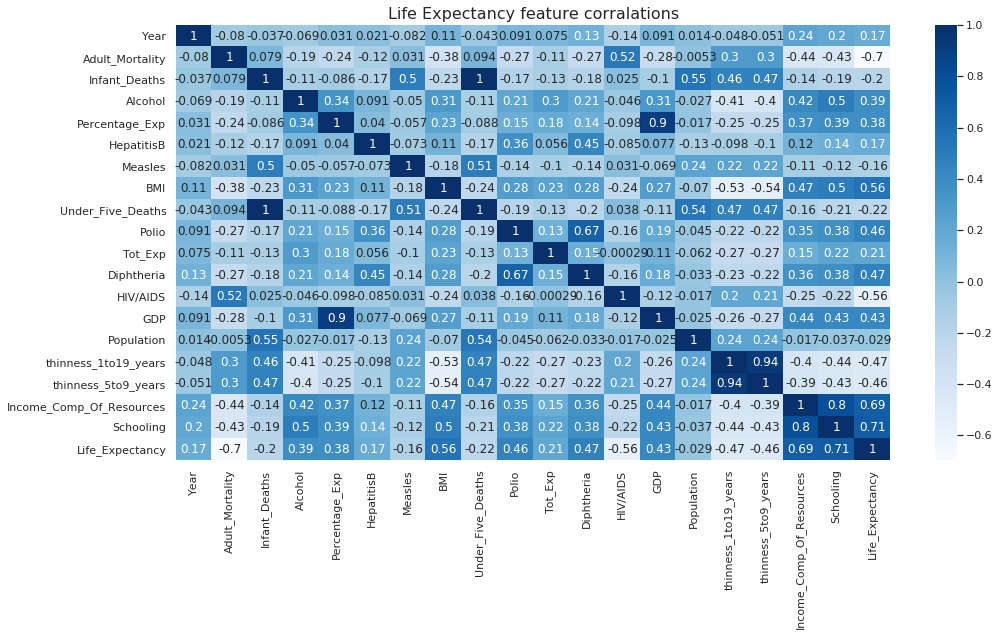

In [125]:
pivot_heatmap(df=non_cate_plus_target_preliminar.corr("pearson"), p_annot=True, p_cmap="Blues", fig_size_width = 16, fig_size_height =8, p_ax_title="Life Expectancy feature corralations")

In [126]:
# selecting those features which have a high correlation with our target variable Life_Expectancy.
# In this case we gonna choose two variables only (according to the general indications of the exercise).
# Adult_Mortality and Schooling
non_cate_plus_target_preliminar_corr_ser = non_cate_plus_target_preliminar.corr("pearson")["Life_Expectancy"].sort_values(ascending=True)
non_cate_plus_target_preliminar_corr_df = pd.DataFrame()
non_cate_plus_target_preliminar_corr_df["feature"] = non_cate_plus_target_preliminar_corr_ser.index
non_cate_plus_target_preliminar_corr_df["corr_val"] = non_cate_plus_target_preliminar_corr_ser.values

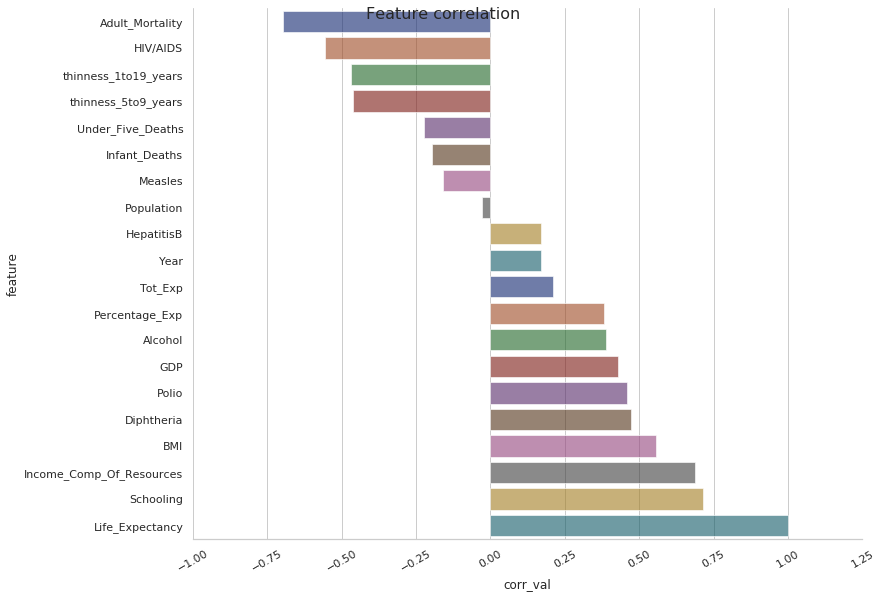

In [127]:
categorical_plot(df=non_cate_plus_target_preliminar_corr_df, p_kind="bar", p_x="corr_val", p_y="feature", 
                 p_hue =None, p_ci="sd", p_palette="dark", p_alpha=0.6, 
                 p_height=8, p_sub_title = "Feature correlation")

#### Describing corralation between features (dealing with multicollinearity)

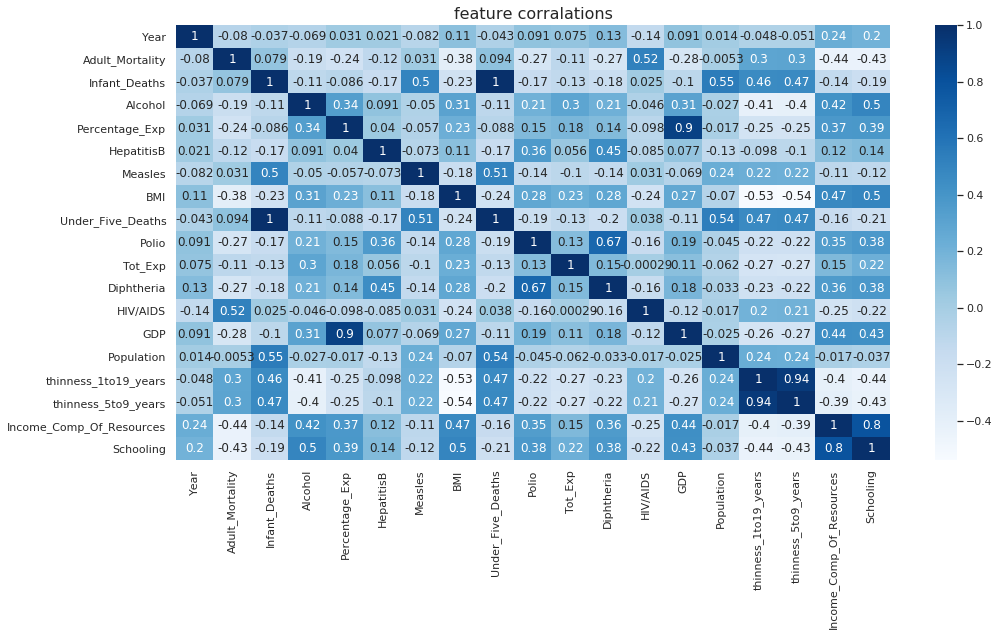

In [128]:
#Plotting corrations between features (Adult_Mortality and Schooling in particular)
pivot_heatmap(df=non_cate_preliminar_X.corr("pearson"), p_annot=True, p_cmap="Blues", fig_size_width = 16, fig_size_height =8, p_ax_title="feature corralations")

In [129]:
non_cate_non_target_preliminar_corr_ser = non_cate_preliminar_X.corr("pearson")["Adult_Mortality"].sort_values(ascending=True)
non_cate_non_target_preliminar_corr_df = pd.DataFrame()
non_cate_non_target_preliminar_corr_df["feature"] = non_cate_non_target_preliminar_corr_ser.index
non_cate_non_target_preliminar_corr_df["corr_val"] = non_cate_non_target_preliminar_corr_ser.values

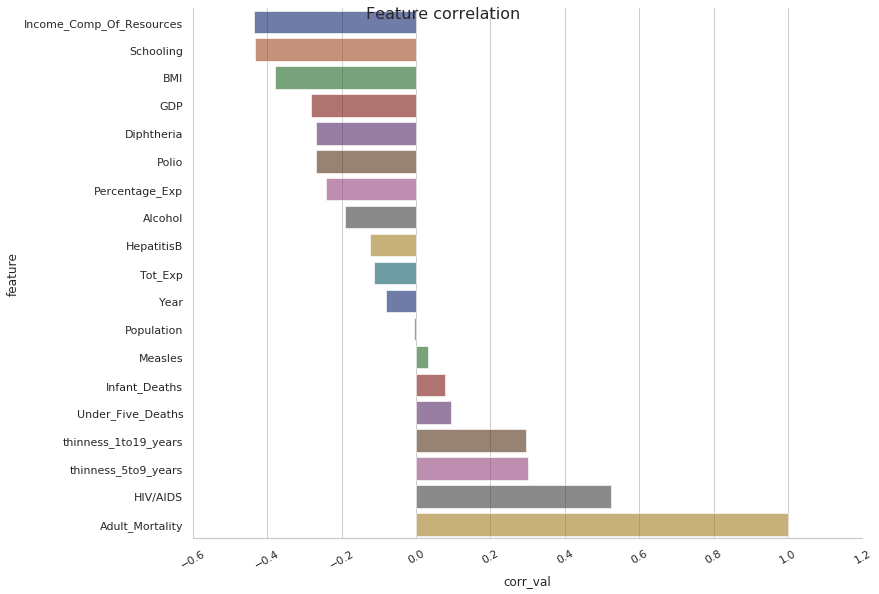

In [130]:
# The correlation rmeasures the strength of the linear relationship (Pearson)
# between two quantitative variables.
# r < 0.3 None or very weak
# 0.3 < r <0.5 Weak
# 0.5 < r < 0.7 Moderate
# r > 0.7 Strong
# In this case r < 0 indicates a negative association.
# So, we discard multicollinearity issues with this variables
categorical_plot(df=non_cate_non_target_preliminar_corr_df, p_kind="bar", p_x="corr_val", p_y="feature", 
                 p_hue =None, p_ci="sd", p_palette="dark", p_alpha=0.6, 
                 p_height=8, p_sub_title = "Feature correlation")

### First Multivariate model (Multiple regression) 

#### Preparing data for training

In [131]:
#So, at first we gonna keep the non categorical vars and include only the two previously choosen cols
df_ols_multi_non_cate_var =  dfLifeExpectancyWhoFix[["Adult_Mortality", "Schooling", "Life_Expectancy"]]
X = df_ols_multi_non_cate_var.drop('Life_Expectancy', axis=1)
Y = df_ols_multi_non_cate_var['Life_Expectancy']

In [132]:
X.head(3)

Adult_Mortality  Schooling
0            263.0       10.1
1            271.0       10.0
2            268.0        9.9

In [133]:
Y.head(3)

0    65.0
1    59.9
2    59.9
Name: Life_Expectancy, dtype: float64

#### Splitting data for training

In [134]:
# Since we're not going to use reinforcement learning we gonna divide in train and test only (80/20)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [136]:
X_train.shape, Y_train.shape

((2350, 2), (2350,))

In [137]:
X_test.shape, Y_test.shape

((588, 2), (588,))

#### Training and testing the model

In [138]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
internalpred = lm.predict(X_train)
r2_score(Y_train,internalpred)

0.6931298551933083

In [140]:
externalpred = lm.predict(X_test)
r2_score(Y_test,externalpred)

0.6927374568032582

In [141]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Adult_Mortality    -0.037233
Schooling           1.456043

In [142]:
lm.intercept_

57.922973582101086

In [143]:
X_train.head(3)

Adult_Mortality  Schooling
456             126.0       11.9
462             152.0       11.0
2172            143.0       12.9

In [144]:
#df_ols_multi_non_cate_var_plot = pd.DataFrame()

In [145]:
df_ols_multi_non_cate_var_plot = X_train
df_ols_multi_non_cate_var_plot["Y_train"] = Y_train
df_ols_multi_non_cate_var_plot["Y_train_predict"] = internalpred

/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
df_ols_multi_non_cate_var_plot.head()

Adult_Mortality  Schooling  Y_train  Y_train_predict
456             126.0       11.9     72.3        70.558479
462             152.0       11.0     73.0        68.279971
2172            143.0       12.9     74.6        71.381554
2667             13.0       14.7     74.9        78.842774
381              95.0       13.3     74.8        73.751175

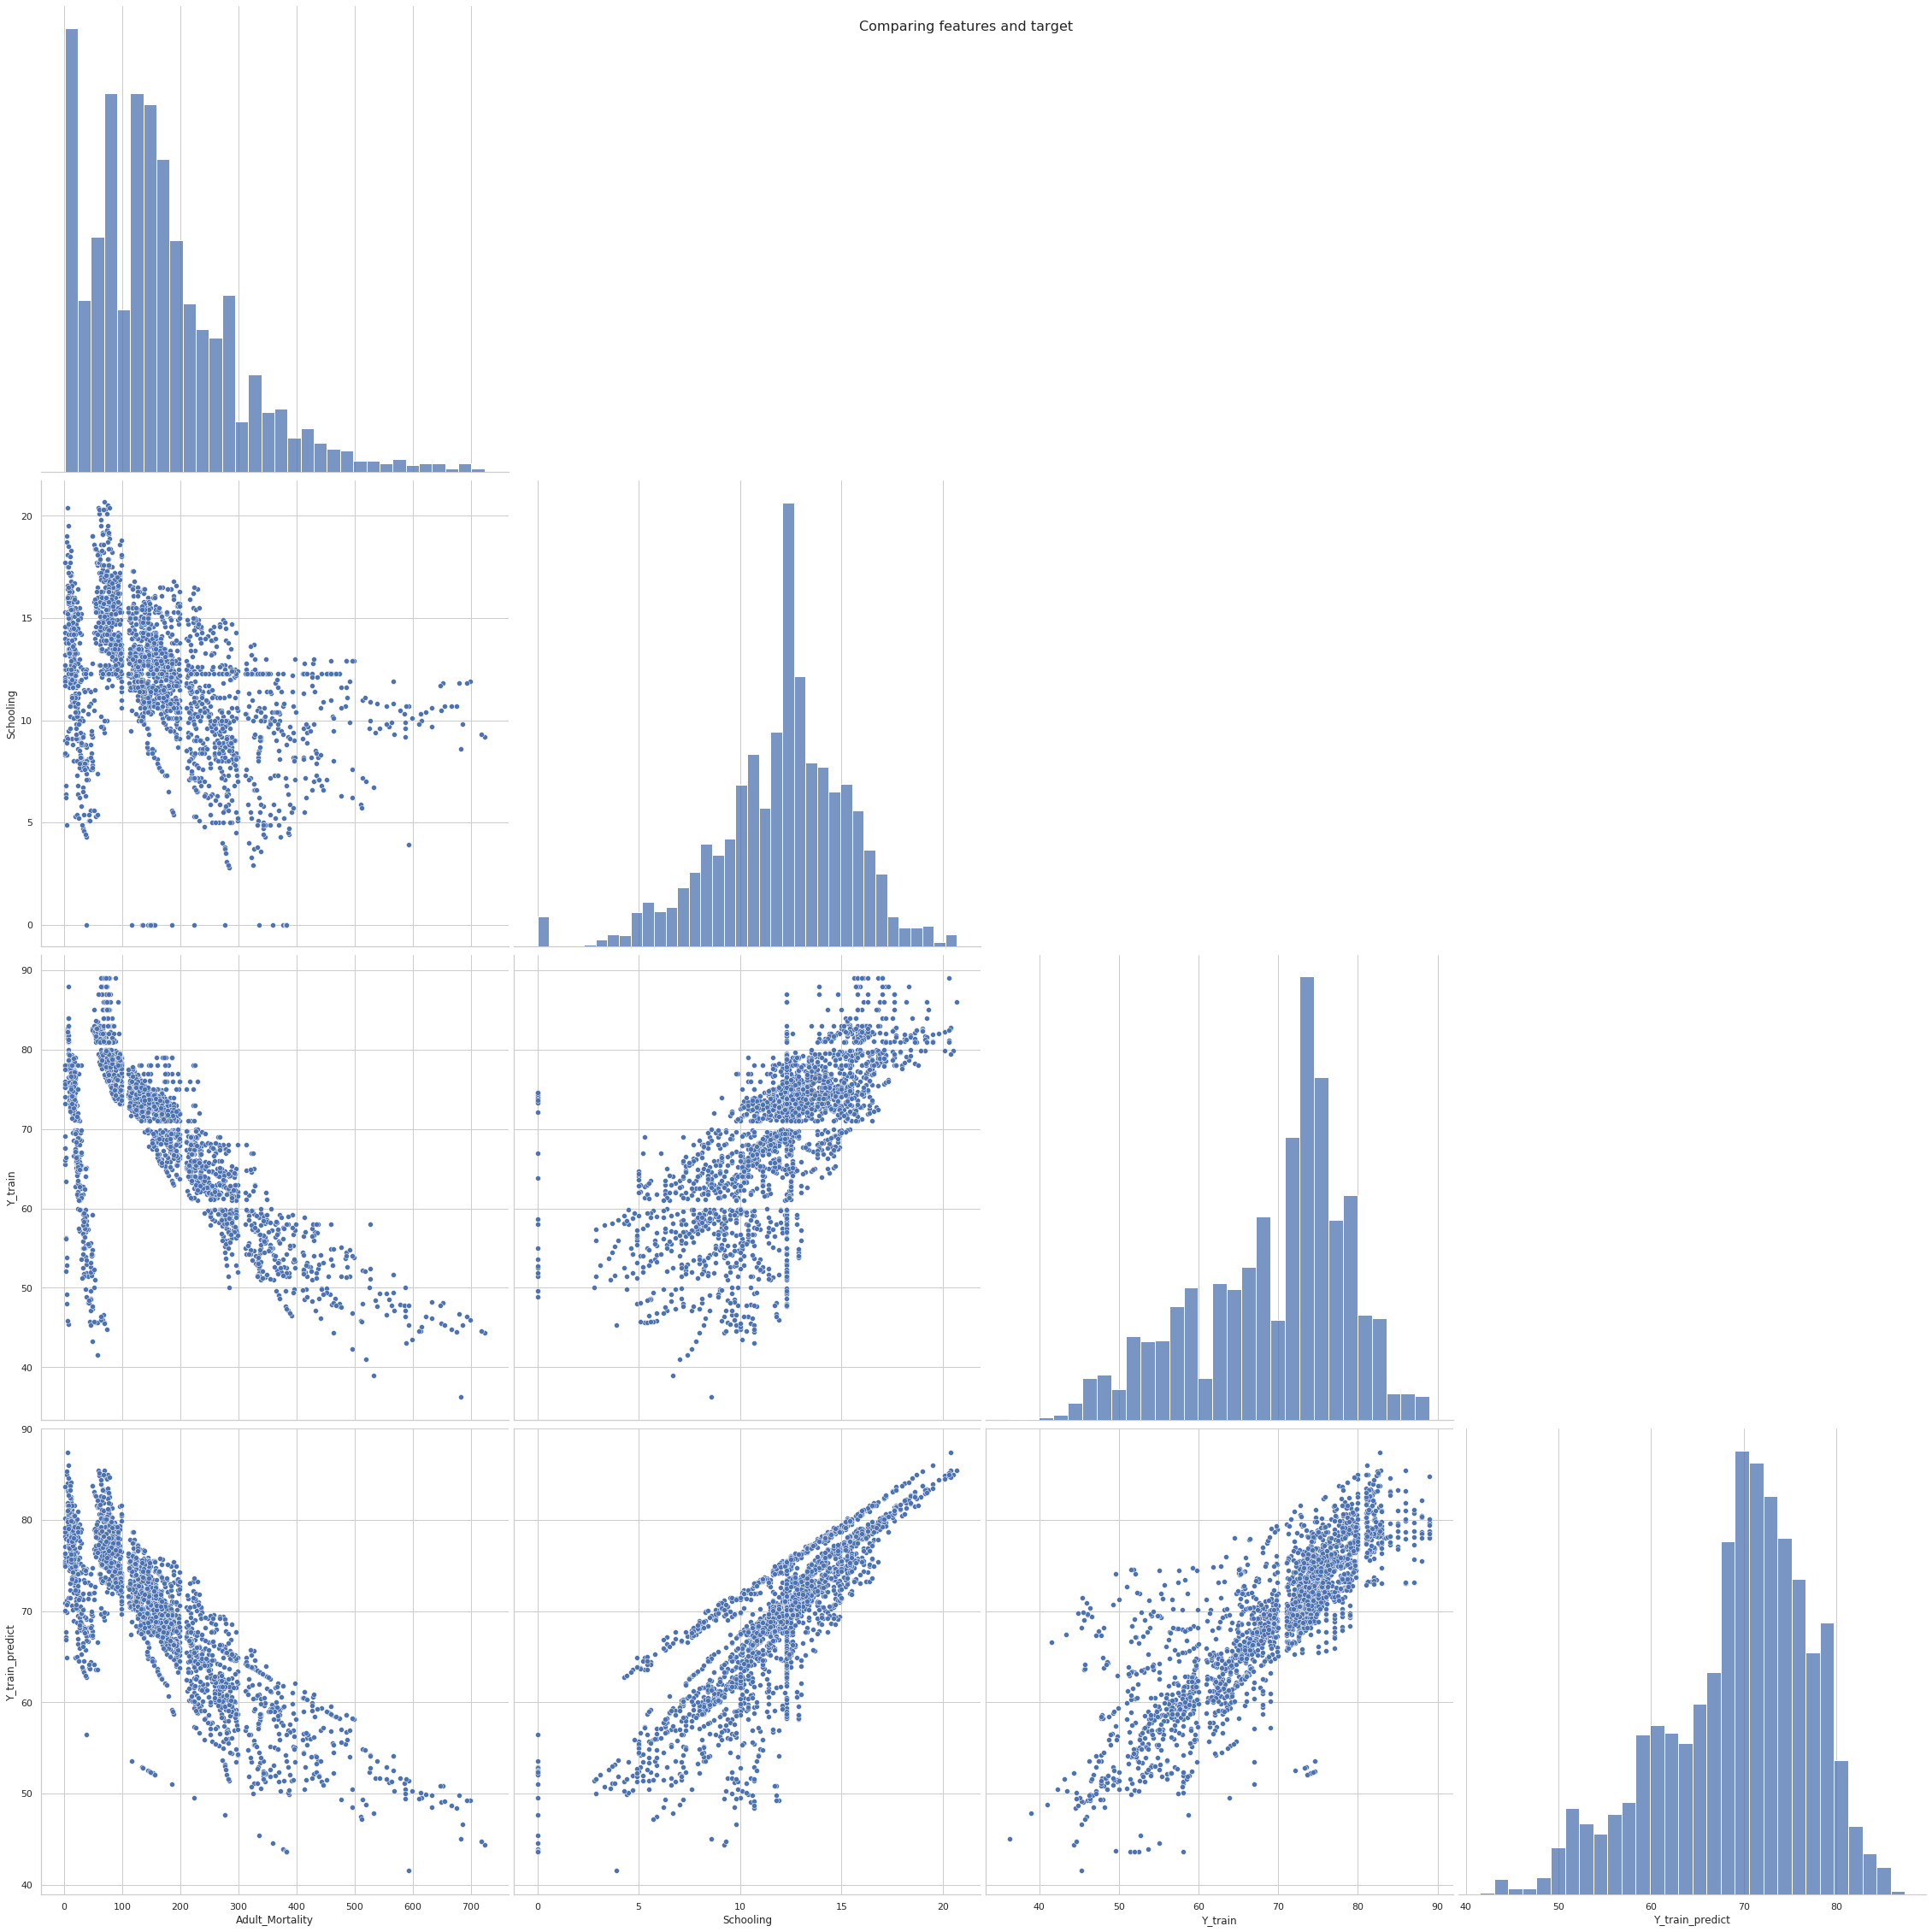

In [147]:
custom_pairplot(df = df_ols_multi_non_cate_var_plot, p_corner = True, fig_size_height=8, p_ax_title = "Comparing features and target")

In [148]:
len(Y_test)

588

In [149]:
type(externalpred)

numpy.ndarray

In [150]:
df_ols_multi_non_cate_var_YTest_pred_plot = pd.DataFrame()
df_ols_multi_non_cate_var_YTest_pred_plot["Y_test"] = Y_test
df_ols_multi_non_cate_var_YTest_pred_plot = df_ols_multi_non_cate_var_YTest_pred_plot.reset_index(drop=True)
new_series = pd.Series(externalpred).copy()
df_ols_multi_non_cate_var_YTest_pred_plot["Y_prediction"] = new_series
df_ols_multi_non_cate_var_YTest_pred_plot.head(3)

Y_test  Y_prediction
0    73.7     69.942157
1    75.9     73.954599
2    74.2     73.070986

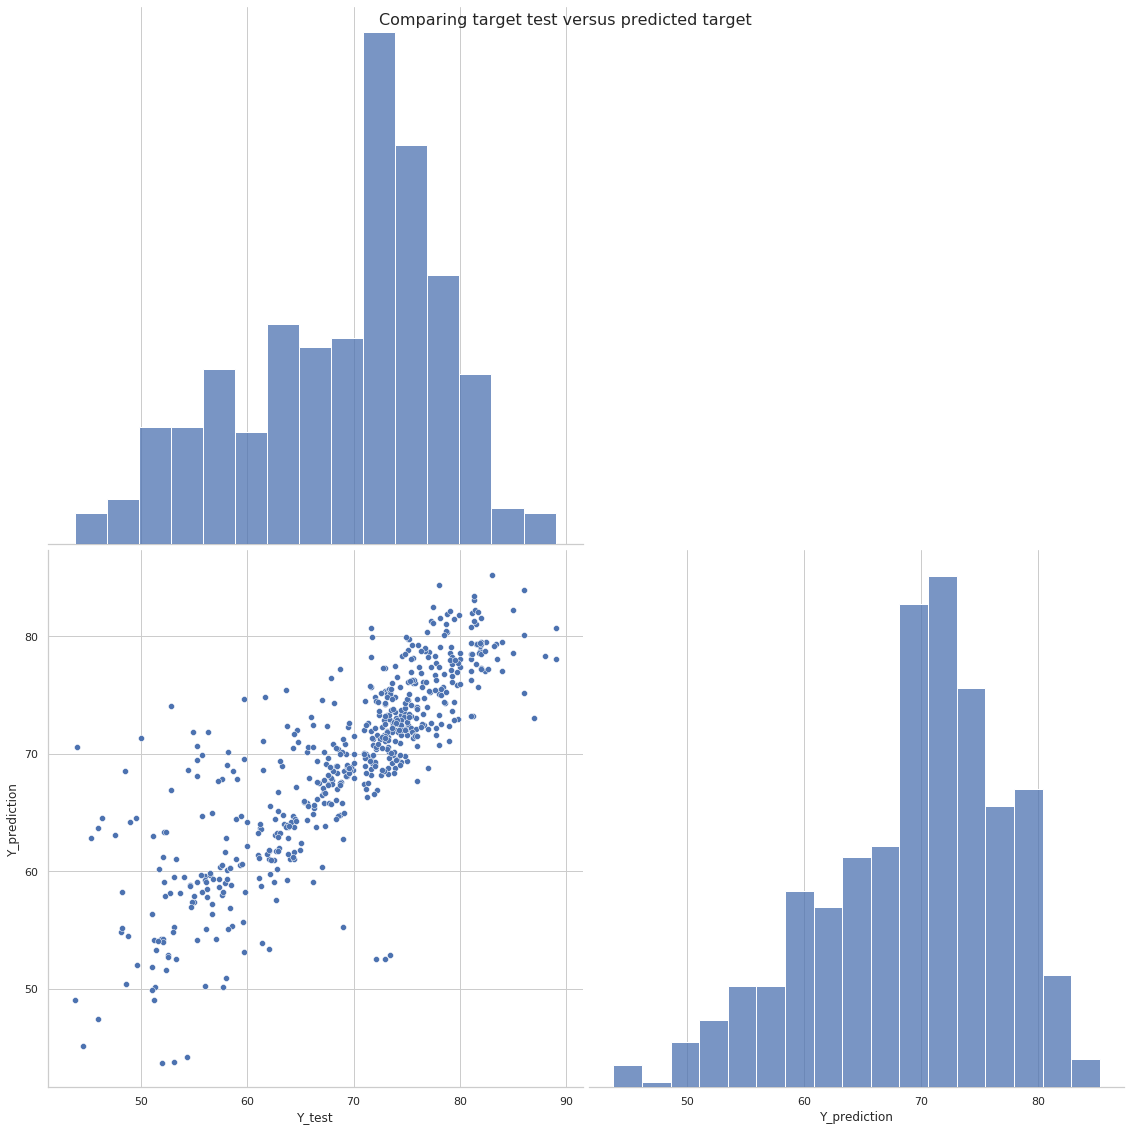

In [151]:
custom_pairplot(df = df_ols_multi_non_cate_var_YTest_pred_plot, p_corner = True, fig_size_height=8, p_ax_title = "Comparing target test versus predicted target")

#### Dealing with residuals

In [152]:
# Normally distributed residuals means the model is a correct choice for the data. 

In [153]:
df_ols_multi_non_cate_var_calc_residual_plot = df_ols_multi_non_cate_var_YTest_pred_plot.copy()
df_ols_multi_non_cate_var_calc_residual_plot["residual"] = df_ols_multi_non_cate_var_calc_residual_plot["Y_test"] - df_ols_multi_non_cate_var_calc_residual_plot["Y_prediction"]
df_ols_multi_non_cate_var_calc_residual_plot.head(3)

Y_test  Y_prediction  residual
0    73.7     69.942157  3.757843
1    75.9     73.954599  1.945401
2    74.2     73.070986  1.129014

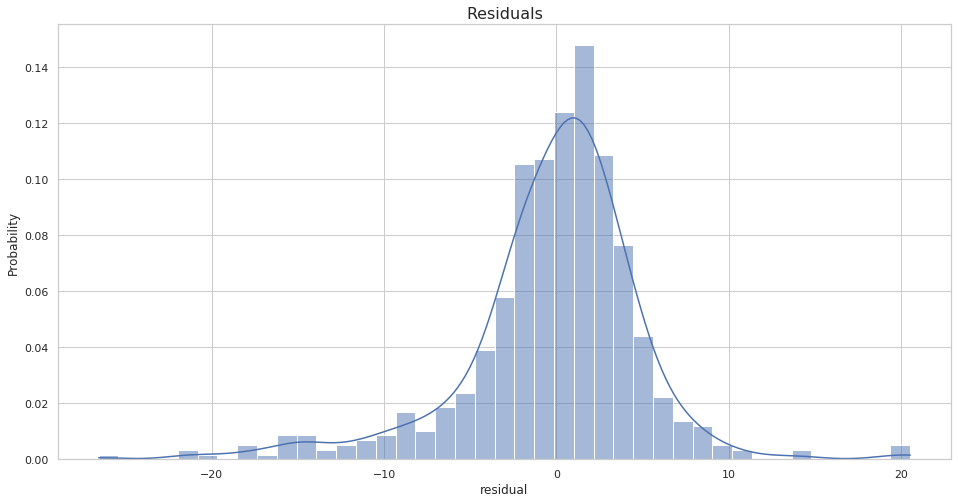

In [154]:
custom_histplot(df = df_ols_multi_non_cate_var_calc_residual_plot, p_x = "residual", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Residuals")

#### Calculating model metrics

In [155]:
print_sklean_eval_metrics(Y_train, internalpred, Y_test, externalpred)

Training set performance
MAE: 3.62782400847023
MSE: 28.020628727102153
RMSE: 5.29345149473405
RMSLE: 0.006859906352395354
R2 Score: 0.6931298551933083


Testing set performance
MAE: 3.5328307881735608
MSE: 26.629635075764774
RMSE: 5.160390980901037
RMSLE: 0.006552975010190225
R2 Score: 0.6927374568032582


### Second Multivariate model (Multiple regression) 

#### Preparing data for training

In [156]:
# At this point we're going to include one non categorical var and one categorical var
# Based on previous analsysus in First Multivariable model, we determined the non categorical var "BMI"
# as the chosen one, because the correlation with target var and no multicollinearity issues was found
df_ols_multi_with_cate_var =  dfLifeExpectancyWhoFix[["Adult_Mortality", "Schooling", "BMI", "Status" ,"Life_Expectancy"]]
# The chosen categorical variable is: "Status"
# In this case we gonna use pandas function get_dummies() wich is a one-hot encoding 
# But, we also could use sklearn.preprocessing.OneHotEncoder instead
df_ols_multi_with_cate_var = pd.get_dummies(df_ols_multi_with_cate_var, columns=["Status"])

In [157]:
df_ols_multi_with_cate_var.head(3)

Adult_Mortality  Schooling   BMI  Life_Expectancy  Status_Developed  \
0            263.0       10.1  19.1             65.0                 0   
1            271.0       10.0  18.6             59.9                 0   
2            268.0        9.9  18.1             59.9                 0   

   Status_Developing  
0                  1  
1                  1  
2                  1

In [158]:
X = df_ols_multi_with_cate_var.drop('Life_Expectancy', axis=1)
Y = df_ols_multi_with_cate_var['Life_Expectancy']

In [159]:
X.head(3)

Adult_Mortality  Schooling   BMI  Status_Developed  Status_Developing
0            263.0       10.1  19.1                 0                  1
1            271.0       10.0  18.6                 0                  1
2            268.0        9.9  18.1                 0                  1

In [160]:
Y.head(3)

0    65.0
1    59.9
2    59.9
Name: Life_Expectancy, dtype: float64

#### Splitting data for training

In [161]:
# Since we're not going to use reinforcement learning we gonna divide in train and test only (80/20)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [163]:
X_train.shape, Y_train.shape

((2350, 5), (2350,))

In [164]:
X_test.shape, Y_test.shape

((588, 5), (588,))

#### Training and testing the model

In [165]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
internalpred = lm.predict(X_train)
r2_score(Y_train,internalpred)

0.7201106423357704

In [167]:
externalpred = lm.predict(X_test)
r2_score(Y_test,externalpred)

0.7277091863372871

In [168]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Adult_Mortality      -0.033827
Schooling             1.131944
BMI                   0.076286
Status_Developed      1.257247
Status_Developing    -1.257247

In [169]:
lm.intercept_

59.12907111862609

In [170]:
X_train.head(3)

Adult_Mortality  Schooling   BMI  Status_Developed  Status_Developing
456             126.0       11.9  25.5                 0                  1
462             152.0       11.0  22.1                 0                  1
2172            143.0       12.9  44.5                 0                  1

In [171]:
#df_ols_multi_non_cate_var_plot = pd.DataFrame()

In [172]:
df_ols_multi_with_cate_var_plot = X_train
df_ols_multi_with_cate_var_plot["Y_train"] = Y_train
df_ols_multi_with_cate_var_plot["Y_train_predict"] = internalpred

/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
df_ols_multi_with_cate_var_plot.head()

Adult_Mortality  Schooling   BMI  Status_Developed  Status_Developing  \
456             126.0       11.9  25.5                 0                  1   
462             152.0       11.0  22.1                 0                  1   
2172            143.0       12.9  44.5                 0                  1   
2667             13.0       14.7  59.3                 0                  1   
381              95.0       13.3  28.0                 0                  1   

      Y_train  Y_train_predict  
456      72.3        69.025018  
462      73.0        66.867387  
2172     74.6        71.031336  
2667     74.9        78.595412  
381      74.8        71.849099

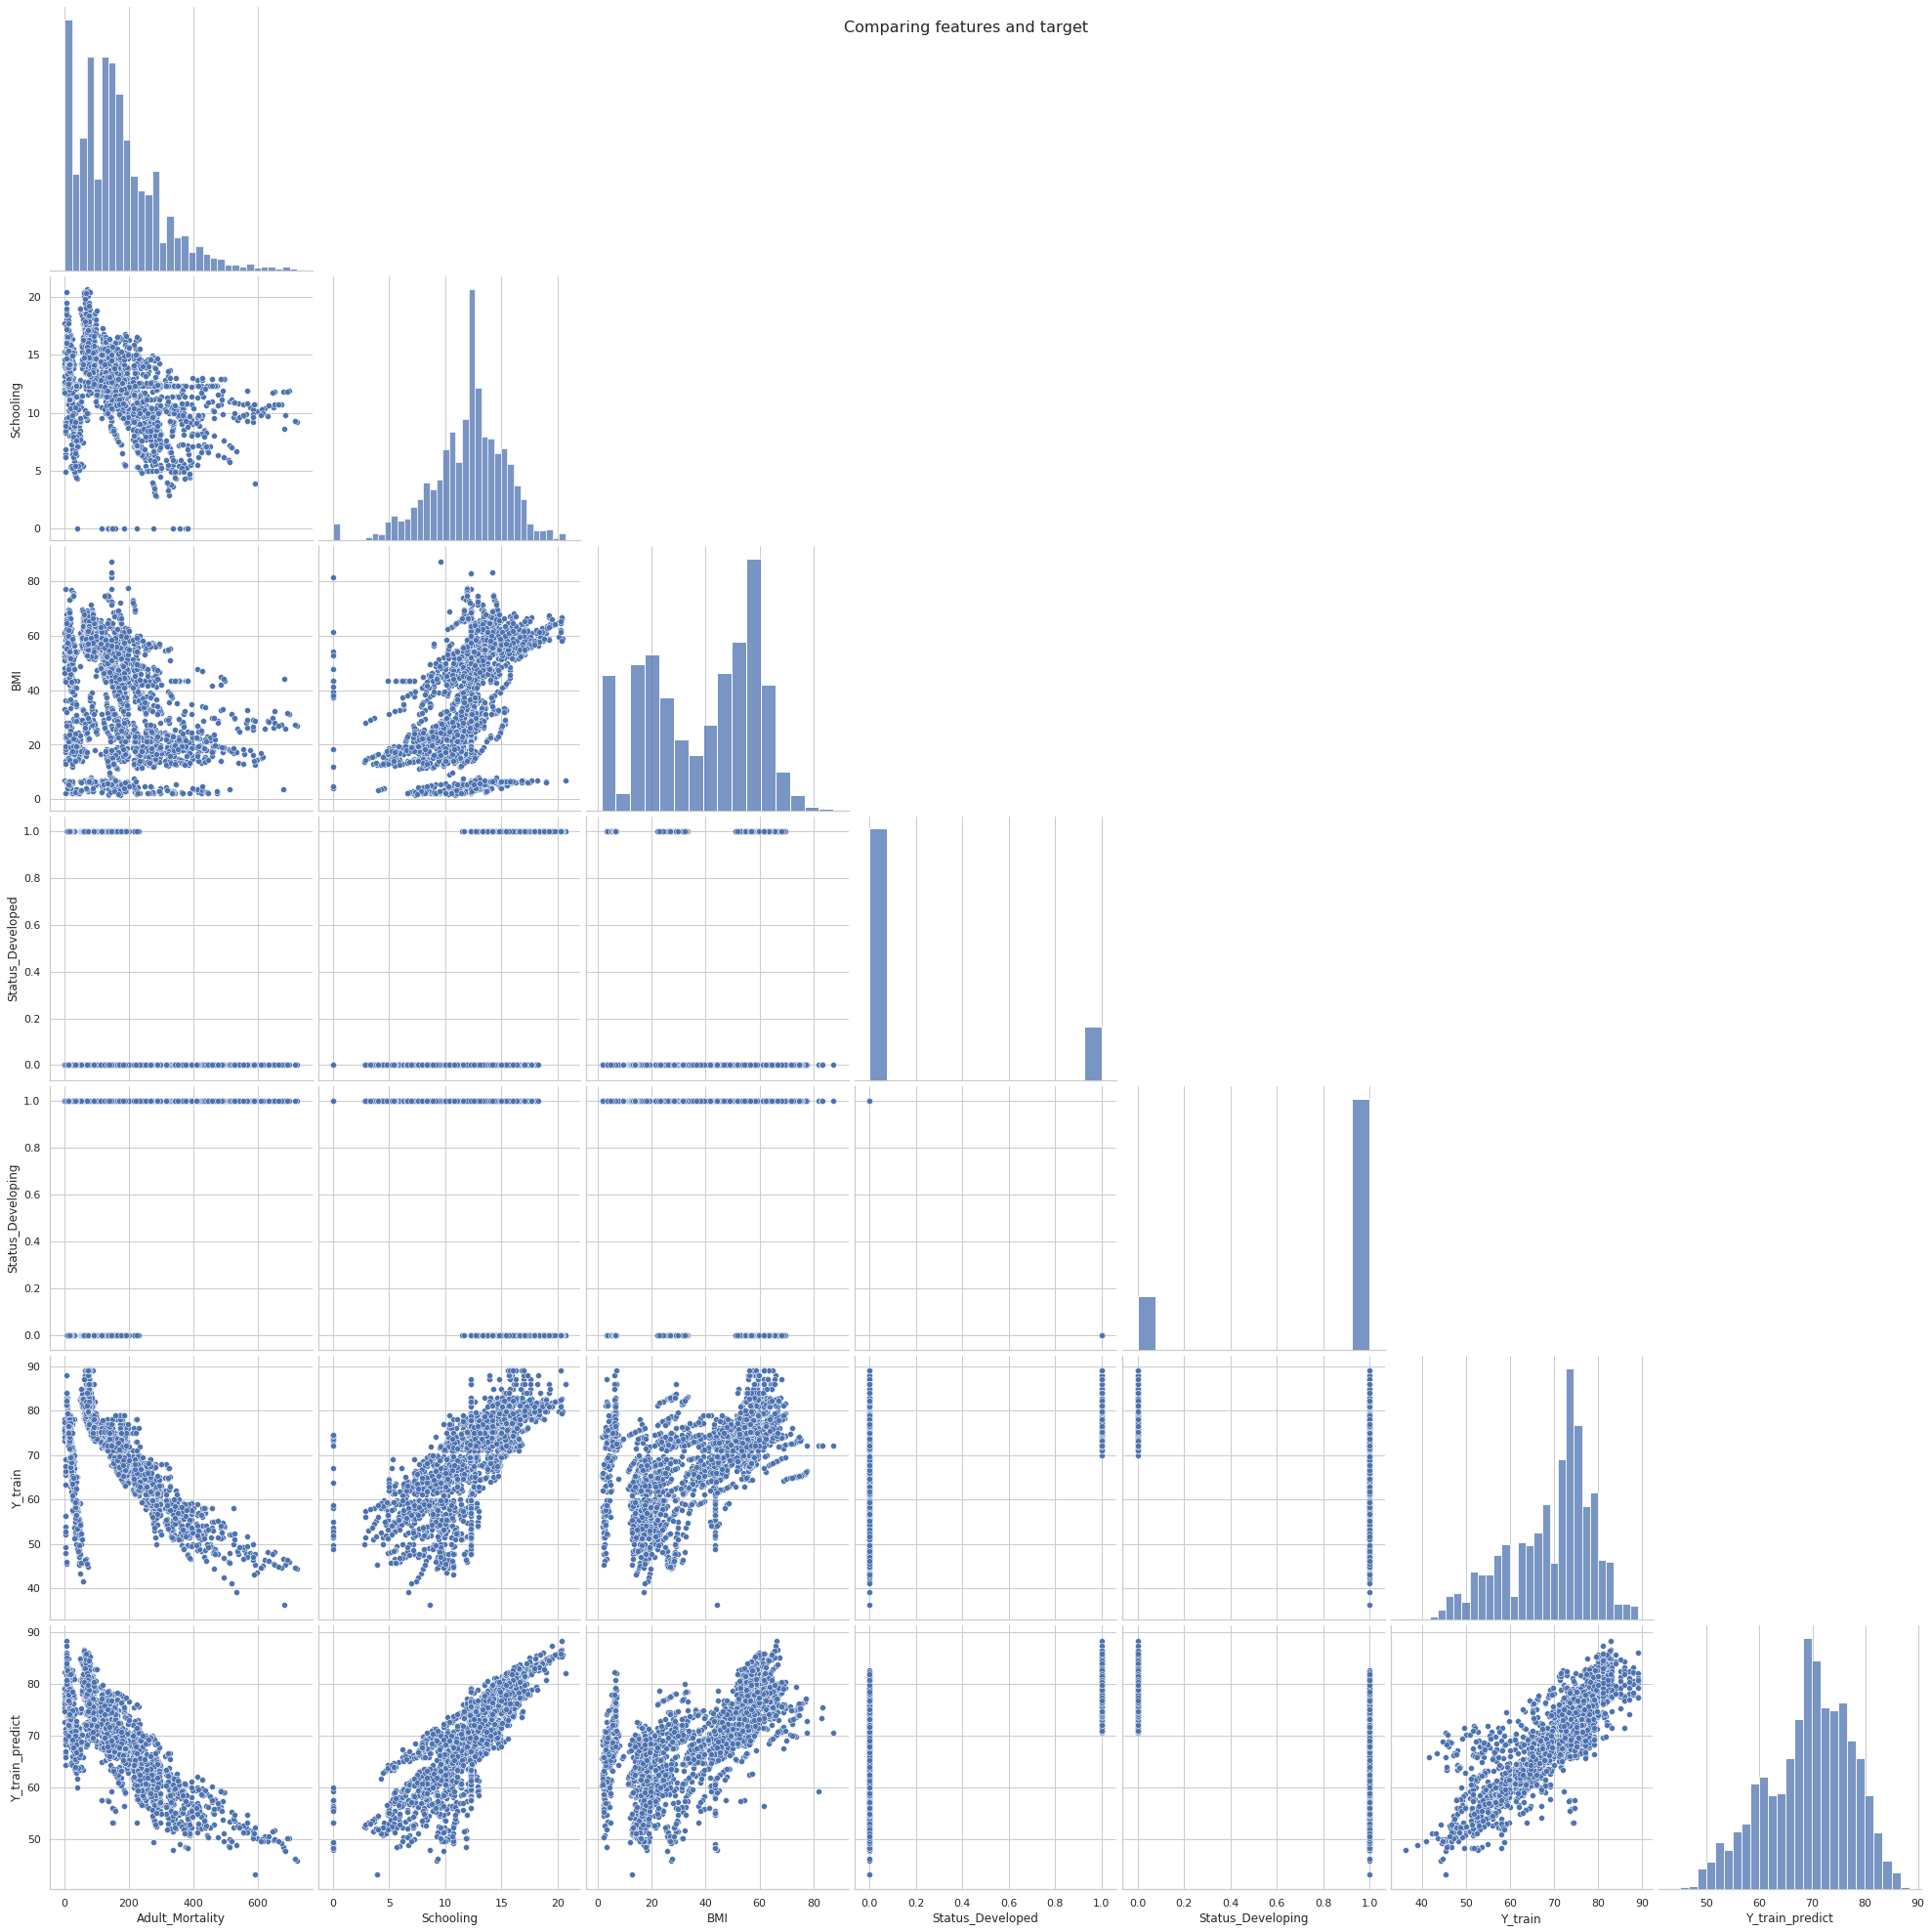

In [174]:
custom_pairplot(df = df_ols_multi_with_cate_var_plot, p_corner = True, fig_size_height=4, p_ax_title = "Comparing features and target")

In [175]:
len(Y_test)

588

In [176]:
type(externalpred)

numpy.ndarray

In [177]:
df_ols_multi_with_cate_var_YTest_pred_plot = pd.DataFrame()
df_ols_multi_with_cate_var_YTest_pred_plot["Y_test"] = Y_test
df_ols_multi_with_cate_var_YTest_pred_plot = df_ols_multi_with_cate_var_YTest_pred_plot.reset_index(drop=True)
new_series = pd.Series(externalpred).copy()
df_ols_multi_with_cate_var_YTest_pred_plot["Y_prediction"] = new_series
df_ols_multi_with_cate_var_YTest_pred_plot.head(3)

Y_test  Y_prediction
0    73.7     70.315110
1    75.9     76.730084
2    74.2     73.401422

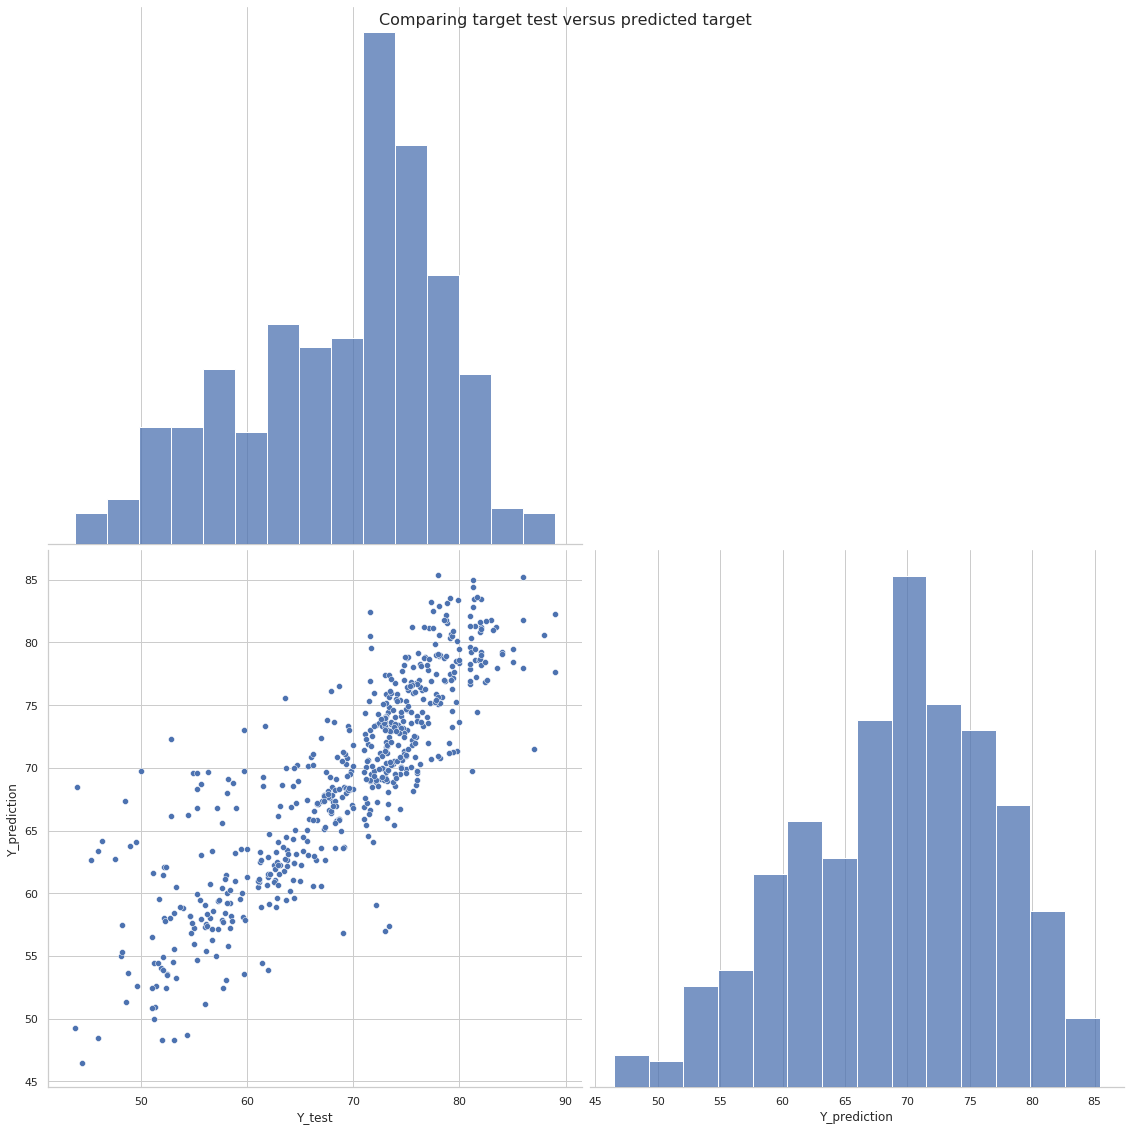

In [178]:
custom_pairplot(df = df_ols_multi_with_cate_var_YTest_pred_plot, p_corner = True, fig_size_height=8, p_ax_title = "Comparing target test versus predicted target")

#### Dealing with residuals

In [179]:
# Normally distributed residuals means the model is a correct choice for the data. 

In [180]:
df_ols_multi_with_cate_var_calc_residual_plot = df_ols_multi_with_cate_var_YTest_pred_plot.copy()
df_ols_multi_with_cate_var_calc_residual_plot["residual"] = df_ols_multi_with_cate_var_calc_residual_plot["Y_test"] - df_ols_multi_with_cate_var_calc_residual_plot["Y_prediction"]
df_ols_multi_with_cate_var_calc_residual_plot.head(3)

Y_test  Y_prediction  residual
0    73.7     70.315110  3.384890
1    75.9     76.730084 -0.830084
2    74.2     73.401422  0.798578

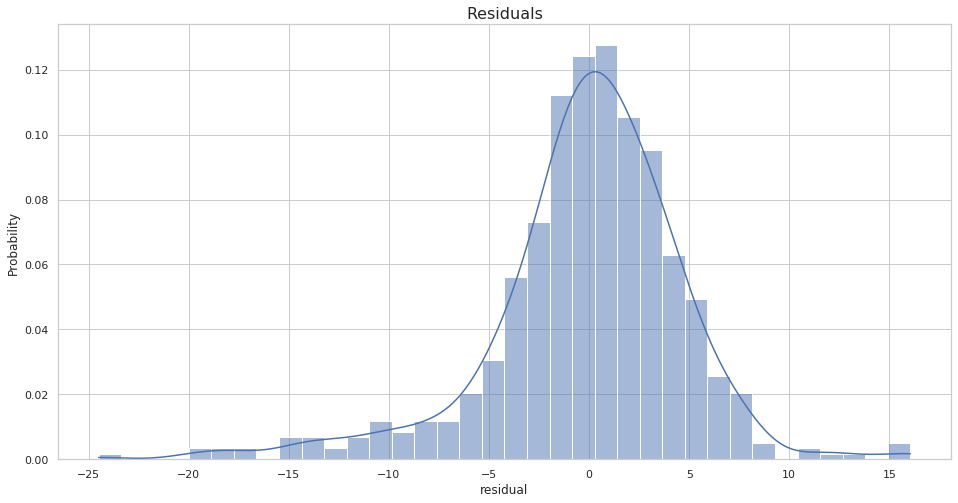

In [181]:
custom_histplot(df = df_ols_multi_with_cate_var_calc_residual_plot, p_x = "residual", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Residuals")

#### Calculating model metrics

In [182]:
print_sklean_eval_metrics(Y_train, internalpred, Y_test, externalpred)

Training set performance
MAE: 3.5692286342808495
MSE: 25.556985286779398
RMSE: 5.055391704584265
RMSLE: 0.006177168117505274
R2 Score: 0.7201106423357704


Testing set performance
MAE: 3.40438835061732
MSE: 23.59872741689263
RMSE: 4.857852140287169
RMSLE: 0.005693914449472494
R2 Score: 0.7277091863372871


In [183]:
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb